### FINAL PROJECT PURWADHIKA GROUP DELTA JCDSOL-014
By
* Rieval Erlangga Wijanarko
* Kristina Larissa Tjandrawijaya
* Febby Putri Milenia Piter
* Adnan Alfath Santoso

## Business Problem Understanding

**Context**

Sebuah perusahaan memiliki 2 jenis penginapan (resort dan hotel). Penginapan yang ada memiliki banyak pelanggan. Diantara pelanggan yang memesan kamar, terdapat pelanggan yang membatalkan (cancelling) pesanan kamar mereka. Hotel-hotel tersebut membutuhkan analisis dan perencanaan dalam mengatasi kamar yang telah dibatalkan pemesanannya karena akan mempengaruhi pendapatan hotel. Oleh karena itu, analisis dan strategi yang baik akan membantu mengurangi biaya dan waktu serta kualitas pelayanan hotel.

Target:

0 = Pemesanan kamar tidak dibatalkan (is_canceled = 0)

1 = Pemesanan kamar dibatalkan (is_canceled = 1)

**Problem Statement:**

Proses persiapan kamar sebelum siap digunakan oleh pelanggan (customer) akan memakan banyak biaya yang harus ditanggung oleh hotel dan resort (penginapan). Perusahaan ingin meningkatkan efisiensi cost dengan mengetahui pelanggan mana yang akan melakukan pembatalan pesanan.

Jika hotel langsung memproses semua pesanan terhadap kamar penginapan, maka biaya tersebut akan sia-sia jika ada kamar dibatalkan oleh pelanggan.

**Goals:**
Oleh karena itu, perusahaan ingin dapat memprediksi kemungkinan sebuah pesanan menginap akan dibatalkan atau tidak, sehingga dapat memfokuskan pelayanan pada pesanan yang tidak dibatalkan.

Dan juga, perusahaan ingin mengetahui apa faktor atau variabel yang membuat sebuah pesanan menginap dibatalkan, sehingga perusahaan dapat membuat strategi yang lebih baik untuk mempersuasi/mendekati pelanggan yang tidak jadi memesan (customer potensial).

**Analytic Approach:**
Tujuan utama yang akan dikerjakan pada permasalah ini adalah menganalisis data untuk menemukan pola yang membedakan customer yang mau menginap di hotel/resort dan yang tidak mau.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang customer akan/ingin menginap di hotel/resort atau tidak.

**Type 1 Error (false positive):**

Konsekuensi: sia-sianya biaya maintenance, waktu dan sumber daya

**Type 2 Error (false negative):**

Konsekuensi: kehilangan customer potensial


**Evaluation Matrix**
- **Accuracy:** Mengukur proporsi prediksi yang benar dari total prediksi.
Karena menargetkan akurasi minimal 70%. Namun, accuracy saja tidak cukup karena bisa bias jika data imbalance (misalnya, jika mayoritas pesanan tidak dibatalkan, accuracy bisa tinggi hanya dengan memprediksi semuanya tidak dibatalkan).

- **Precision:** Mengukur proporsi prediksi pembatalan yang benar-benar dibatalkan.
Karena ingin menghindari false positives (prediksi pembatalan yang salah), karena ini bisa menyebabkan overbooking yang tidak perlu.

- **Recall:** Mengukur proporsi pembatalan yang benar yang teridentifikasi.
Karena penting untuk memastikan bahwa sistem tidak melewatkan terlalu banyak pembatalan (false negatives), yang bisa mengakibatkan kamar tidak digunakan.

- **F1-Score:** Kombinasi dari precision dan recall.
Karena jika ingin keseimbangan antara precision dan recall, F1-score adalah matriks yang bisa digunakan untuk dipertimbangkan karena memberikan gambaran yang lebih menyeluruh.



**Stakeholder:**
- ⁠Manajemen Hotel: Mereka bertanggung jawab untuk mengambil keputusan strategis terkait kebijakan pembatalan dan mengoptimalkan pendapatan hotel.
- ⁠Tim Operasional: Tim tsb perlu informasi untuk mengatur sumber daya dengan efisien berdasarkan prediksi pembatalan kamar.
- Tim Pemasaran: Tim tsb dapat menggunakan wawasan untuk merancang promosi yang mengurangi pembatalan dan meningkatkan kepuasan pelanggan.

**Project Limitation:**
- lead_time = Berdasarkan aplikasi booking hotel seperti Traveloka dan Trivago, customer hanya dapat memilih tanggal check-in sejauh 365 hari sebelum menginap.
- stays_in_week_nights = lama hari menginap customer di hari kerja (week day). Dari riset yang dilakukan, tidak ada hotel yang membatasi waktu menginap (stay) selama customer membayar biaya tambahan sesuai jumlah hari tambahan menginap. Oleh karena itu, akan dicari rata-ratanya dan membuat batasan berdasarkan rata-rata.
- days_in_waiting_list = hari dimana hotel menaruh customer di waiting list hotel (asumsi: karena keterbaasan fasilitas atau jasa). Berdasarkan riset, customer yang ditempatkan di waiting list diengaruhi dengan popularitas suatu tempat, season (musim liburan) dan ketersediannya fasilitas atau jasa. Dikarenakan tidak ada informasi mengenai 3 hal diatas, kami akan membuat asumsi dari rata-rata waiting list.


## Data Understanding


Dataset Source: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?resource=download

Dataset ini berisi informasi pemesanan untuk city hotel dan hotel resort, termasuk kapan pemesanan dibuat, durasi menginap, jumlah orang dewasa, anak-anak, dan/atau bayi, serta jumlah tempat parkir yang tersedia, dan lain-lain.

Semua informasi yang dapat mengidentifikasi secara pribadi telah dihapus dari data ini.

### Attribute Information



| Attribute                       | Data Type | Length | Description |
|---------------------------------|-----------|--------|-------------|
| hotel                           | object    | --     | Jenis hotel (Resort Hotel atau City Hotel). |
| is_canceled                     | int64     | --     | Menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0). |
| lead_time                       | int64     | --     | Jumlah hari antara pemesanan dan kedatangan. |
| arrival_date_year               | int64     | --     | Tahun tanggal kedatangan. |
| arrival_date_month              | object    | --     | Bulan tanggal kedatangan. |
| arrival_date_week_number        | int64     | --     | Kedatangan pada minggu keberapa |
| arrival_date_day_of_month       | int64     | --     | Hari di bulan tanggal kedatangan. |
| stays_in_weekend_nights         | int64     | --     | Jumlah malam akhir pekan (Sabtu/Minggu) yang tamu pesan untuk menginap di hotel. |
| stays_in_week_nights            | int64     | --     | Jumlah malam hari kerja (Senin-Jumat) tamu pesan untuk menginap di hotel. |
| adults                          | int64     | --     | Jumlah orang dewasa. |
| children                        | float64   | --     | Jumlah anak. |
| babies                          | int64     | --     | Jumlah bayi. |
| meal                            | object    | --     | Jenis makanan yang dipesan. |
| country                         | object    | --     | Negara asal pelanggan. |
| market_segment                  | object    | --     | Penunjukan segmen pasar. |
| distribution_channel            | object    | --     | Saluran distribusi pemesanan. |
| is_repeated_guest               | int64     | --     | Menunjukkan apakah tamu tersebut adalah pelanggan yang pernah memesan sebelumnya (1) atau tidak (0). |
| previous_cancellations          | int64     | --     | Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan. |
| previous_bookings_not_canceled  | int64     | --     | Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan. |
| reserved_room_type              | object    | --     | Kode tipe kamar yang dipesan. |
| assigned_room_type              | object    | --     | Kode untuk tipe kamar yang diberikan pada pemesanan. |
| booking_changes                 | int64     | --     | Jumlah perubahan yang dilakukan pada pemesanan. |
| deposit_type                    | object    | --     | Jenis deposit yang dilakukan. |
| agent                           | float64   | --     | ID agen perjalanan yang melakukan pemesanan. |
| company                         | float64   | --     | ID perusahaan yang melakukan pemesanan atau bertanggung jawab membayar pemesanan. |
| days_in_waiting_list            | int64     | --     | Jumlah hari pemesanan berada di daftar tunggu sebelum dikonfirmasi. |
| customer_type                   | object    | --     | Jenis pemesanan, dengan asumsi salah satu dari beberapa kategori. |
| adr                             | float64   | --     | Tarif Harian Rata-rata, yang didefinisikan dengan membagi jumlah seluruh transaksi penginapan dengan jumlah total malam menginap. |
| required_car_parking_spaces     | int64     | --     | Jumlah tempat parkir mobil yang dibutuhkan pelanggan. |
| total_of_special_requests       | int64     | --     | Jumlah permintaan khusus yang dibuat oleh pelanggan. |
| reservation_status              | object    | --     | Status terbaru reservasi. |
| reservation_status_date         | object    | --     | Tanggal saat status terakhir ditetapkan. |

### Library

In [86]:
# Import library yang dibutuhkan untuk eksplorasi dataset


import pandas as pd
import numpy as np

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import plotly.express as px

# Library Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Library Model Selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from collections import defaultdict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Library Oversampling (imbalance dataset)
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set tampilan
pd.set_option('display.max_columns', None)

In [2]:
# Inisialisasi Dataset
data = pd.read_csv('hotel_bookings.csv')

# Menampilkan 5 baris pertama dan terakhir dataset
display(data.head(), data.tail())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [3]:
# Menampilkan informasi umum dataset (kolom, baris dan tipe data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Cleaning

Masih terdapat data yang kosong (nan) pada tiap fitur/kolom dan duplikat data. Selanjutnya, kita akan membersihkan dataset menjadi siap pakai agar siap dipakai untuk melakukan analisat terhadap masalah dan juga pembuatan model machine learning.

### Duplicates

In [4]:
# Cek duplikat data
data.duplicated().sum()

31994

Dikarenakan masih ada duplikat data sebanyak 31994, maka treatment yang akan dilakukan adalah mengambil contoh pertama dari baris-baris duplikat

In [5]:
# Simpan hanya contoh pertama dari setiap baris duplikat
data = data.drop_duplicates(keep='first')

# Cek kembali kolom setelah menghilangkan duplikat
rows_after_removal = data.shape[0]
rows_after_removal

87396

In [6]:
# data unik di tiap kolom
listItem = []
for col in data.columns :
    listItem.append([col, data[col].nunique(), data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2), data[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Nama Fitur', 'Jumlah Value Unik', 'Tipe Data', 'Jumlah Data Kosong', 'Persentase Data Kosong', 'Sampel Value Unik'], data=listItem)
display(tabel1Desc)

,Nama Fitur,Jumlah Value Unik,Tipe Data,Jumlah Data Kosong,Persentase Data Kosong,Sampel Value Unik
0,hotel,2,object,0,0.00,"[Resort Hotel, City Hotel]"
1,is_canceled,2,int64,0,0.00,"[0, 1]"
2,lead_time,479,int64,0,0.00,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,3,int64,0,0.00,"[2015, 2016, 2017]"
4,arrival_date_month,12,object,0,0.00,"[July, August, September, October, November, D..."
5,arrival_date_week_number,53,int64,0,0.00,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,31,int64,0,0.00,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,17,int64,0,0.00,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,35,int64,0,0.00,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,14,int64,0,0.00,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


**Missing Value**

- Beberapa kolom, seperti `children`, `country`, `agent`,`company`,  berisi nilai yang hilang (nan).
- Missing value pada kolom `company` adalah yang terbanyak. Sebanyak 112593 baris, berarti 94.31% data missing.
- kolom `agent` menyusul sebanyak 16430 baris (13.69%) data yang hilang.
- Dan missing value yang tidak banyak berada pada kolom `country` dan `children`, sebesar 488 (0.41%) dan 4 (<0.1%).
- Pada kolom `meal` terdapat value 'undefined'. Oleh karena itu, value tersebut akan dianggap SC (Self Catering)

**Tipe data**
- Tipe data pada kolom `children` berupa float64. Dimana kolom tersebut mewakili jumlah customer/guest anak-anak, tidak mungkin data akan berupa bilangan desimal.



**Missing Value Handling**
- Asumsikan jika tidak ada nilai pada kolom `company`, maka pemesanan mungkin dilakukan oleh customer yang tidak memiliki/tidak dengan atas nama perusahaan (tidak ada company id). Maka akan mengisi missing value dengan '0'.
- Asumsikan jika tidak ada nilai pada kolom `agent`, maka pemesanan mungkin dilakukan oleh customer mandiri atau tanpa melalui agen (tidak ada agent id). Maka missing value akan diisi dengan '0'.
- Jika tidak ada value dalam kolom `country` maka akan dianggap/diisi tidak diketahui 'unknown'.
- Missing value pada kolom `children`, maka akan dicari rata-rata pada jumlah anak (children) dan dibulatkan kebawah.

### Missing Value Handling

In [7]:
# Mengisi missing value pada company, agent, dan country
data['company'].fillna(0.0, inplace=True)
data['agent'].fillna(0.0, inplace=True)
data['country'].fillna('unknown', inplace=True)

# Hitung rata-rata kolom children
rata_rata_anak = data['children'].mean()

# Bulatkan ke bawah
floor_children = np.floor(rata_rata_anak)

print("Rata-rata jumlah anak:", rata_rata_anak)
print("Rata-rata jumlah anak (dibulatkan ke bawah):", floor_children)

Rata-rata jumlah anak: 0.13863969242035884
Rata-rata jumlah anak (dibulatkan ke bawah): 0.0


In [8]:
# Mengisi missing value pada
data['children'].fillna(floor_children, inplace=True)

# Mengubah tipe data kolom children
data['children'] = data['children'].astype('int64')

In [9]:
# Mengisi value 'undefined' pada kolom 'meal' dengan 'SC'
data['meal'] = data['meal'].replace('Undefined', 'SC')

In [10]:
# Cek value unik pada kolom meal
data['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [11]:
# Buat DataFrame dengan menghitung nilai yang hilang untuk setiap kolom.
missing_values_df = data.isnull().sum().reset_index()
missing_values_df.columns = ['Attribute', 'Missing Values']

# Display the DataFrame
missing_values_df

,Attribute,Missing Values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


In [12]:
# Cek tipe data
data.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [13]:
# Menghitung jumlah orang dewasa yang berjumlah 0
count_missing_adult = data[data['adults'] == 0].shape[0]

print("Jumlah baris dengan nilai 0 pada kolom 'adults':", count_missing_adult)

Jumlah baris dengan nilai 0 pada kolom 'adults': 385


Ternyata ada 385 pesanan yang tidak ada orang dewasanya. Pesanan tersebut dianggap tidak valid karena setiap tamu anak dan bayi memerlukan orang tua/sudah cukup umur (adult) untuk memesan.

In [14]:
# Menghapus baris yang tidak memiliki orangtua (0 adults)
data = data[data['adults'] > 0]

In [15]:
# Cek kembali
count_missing_adult = data[data['adults'] == 0].shape[0]

print("Jumlah baris dengan nilai 0 pada kolom 'adults':", count_missing_adult)

Jumlah baris dengan nilai 0 pada kolom 'adults': 0


In [16]:
# Hitung baris data yang tersisa
data.shape

(87011, 32)

### Handling Unreasonable Data


Setelah handling missing value dan duplikat data, kita akan checking data-data yang tidak masuk akal. Data yang dimaksud adalah data yang sangat jauh berbeda dari kumpulan data-data yang ada (dianggap outlier). Ada beberapa angka yang sangat besar yang terlihat pada dataset.



In [17]:
# Mengecek statistik deskriptif dari lead_time
print(data['lead_time'].describe())

count    87011.000000
mean        79.862374
std         86.007705
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64


In [18]:
# Menghitung jumlah lead_time lebih dari 365 hari
lead_time_above_365 = (data['lead_time'] >= 365).sum()

# Hitung persentase
total_rows = len(data)
percentage_above_365 = (lead_time_above_365 / total_rows) * 100

print(f"Persentase lead time lebih dari atau sama dengan 365 hari sebanyak {lead_time_above_365} baris dan sebesar {percentage_above_365:.2f}%")

Persentase lead time lebih dari atau sama dengan 365 hari sebanyak 579 baris dan sebesar 0.67%


Ternyata masih ada data `lead_time` yang lebih dari 365 hari. Oleh karena itu, akan dibuat batas maksimum dimana value yang lebih besar dari 365 akan diubah menjadi batas maksimum (365). Karena datanya kecil, maka akan dihapus.

Menghapus data akan menghilangkan outliers secara langsung, jika data <5% data dapat dihapus.

In [19]:
# Menghapus baris dengan lead_time lebih dari 365 hari
data = data[data['lead_time'] <= 365]

# Mengecek apakah baris sudah terhapus
print(data['lead_time'].describe())

count    86448.000000
mean        77.550377
std         81.217425
min          0.000000
25%         11.000000
50%         48.000000
75%        123.000000
max        365.000000
Name: lead_time, dtype: float64


In [20]:
data.shape

(86448, 32)

In [21]:
# Mengecek statistik deskriptif dari stays_in_week_nights
print(data['stays_in_week_nights'].describe())

count    86448.000000
mean         2.623253
std          2.039186
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64


In [22]:
# Cek 'stays_in_week_nights'
rata_rata_stays_in_week_nights = data['stays_in_week_nights'].mean()
print(rata_rata_stays_in_week_nights)

2.6232532852119195


Rata-rata stays_in_week_nights sebanyak 2.5 hari, dibulatkan keatas menjadi 3 hari. Sekarang kita cek berapakah jumlah stays_in_week_nights dan persentase stays_in_week_nights yang lebih dari 3 hari.

In [23]:
# Menghitung jumlah stays_in_week_nights lebih dari 3
stays_in_week_nights_above_3 = (data['stays_in_week_nights'] >= 3).sum()

# Hitung persentase
percentage_swn_above_3 = (stays_in_week_nights_above_3 / total_rows) * 100

print(f"Persentase stays_in_week_nights lebih dari atau sama dengan 3 hari sebanyak {stays_in_week_nights_above_3} baris dan sebesar {percentage_swn_above_3 :.2f}%")

Persentase stays_in_week_nights lebih dari atau sama dengan 3 hari sebanyak 37856 baris dan sebesar 43.51%


Dikarenakan data yang lebih dari 3 hari sangat banyak, maka kita akan mengubah batasan maksimumnya menjadi 10 hari atau 2 minggu (5 hari perminggu).

In [24]:
# Menghitung jumlah stays_in_week_nights lebih dari 10
stays_in_week_nights_above_10 = (data['stays_in_week_nights'] >= 10).sum()

# Hitung persentase
percentage_swn_above_10 = (stays_in_week_nights_above_10 / total_rows) * 100

print(f"Persentase stays_in_week_nights lebih dari atau sama dengan 10 hari sebanyak {stays_in_week_nights_above_10} baris dan sebesar {percentage_swn_above_10 :.2f}%")

Persentase stays_in_week_nights lebih dari atau sama dengan 10 hari sebanyak 1277 baris dan sebesar 1.47%


In [25]:
# Menghapus baris dengan stays_in_week_nights lebih dari 10 hari
data = data[data['stays_in_week_nights'] <= 10]

# Mengecek apakah baris sudah terhapus
print(data['stays_in_week_nights'].describe())

count    86119.000000
mean         2.571709
std          1.835975
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: stays_in_week_nights, dtype: float64


In [26]:
data.shape

(86119, 32)

In [27]:
print(data['days_in_waiting_list'].describe())

count    86119.000000
mean         0.677667
std          8.777392
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        259.000000
Name: days_in_waiting_list, dtype: float64


In [28]:
# Cek 'days_in_waiting_list	'
rata_rata_days_in_waiting_list = data['days_in_waiting_list'].mean()

print(rata_rata_days_in_waiting_list)

0.6776669492214261


In [29]:
# Menghitung jumlah days_in_waiting_list lebih dari 1 hari (dibulatkan keatas)
days_in_waiting_list_above_1 = (data['days_in_waiting_list'] >= 1).sum()

# Hitung persentase
percentage_dwl_above_1 = (days_in_waiting_list_above_1 / total_rows) * 100

print(f"Persentase days_in_waiting_list lebih dari atau sama dengan 1 hari sebanyak {days_in_waiting_list_above_1} baris dan sebesar {percentage_dwl_above_1 :.2f}%")

Persentase days_in_waiting_list lebih dari atau sama dengan 1 hari sebanyak 828 baris dan sebesar 0.95%


In [30]:
# Menghapus baris dengan stays_in_week_nights lebih dari 10 hari
data = data[data['days_in_waiting_list'] <= 10]

# Mengecek apakah baris sudah terhapus
print(data['days_in_waiting_list'].describe())

count    85361.000000
mean         0.004042
std          0.161472
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: days_in_waiting_list, dtype: float64


In [31]:
data.shape

(85361, 32)

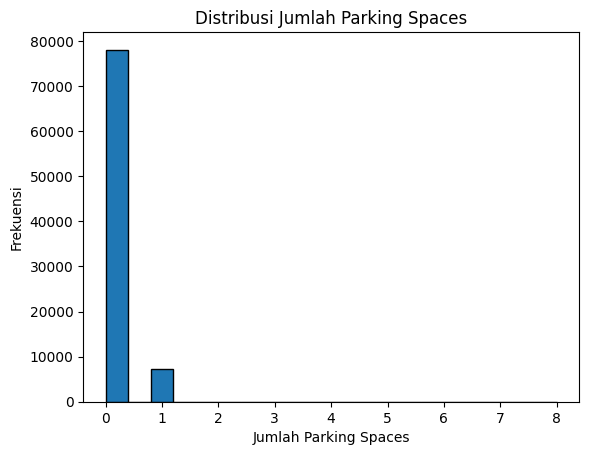

count    85361.000000
mean         0.085625
std          0.282394
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64


In [32]:
# Plot histogram
plt.hist(data['required_car_parking_spaces'], bins=20, edgecolor='k')
plt.title('Distribusi Jumlah Parking Spaces')
plt.xlabel('Jumlah Parking Spaces')
plt.ylabel('Frekuensi')
plt.show()

# Deskripsi statistik
print(data['required_car_parking_spaces'].describe())

In [33]:
# Melihat nilai maksimum dan minimum
max_parking = data['required_car_parking_spaces'].max()
min_parking = data['required_car_parking_spaces'].min()

print(f"Nilai maksimum: {max_parking}")
print(f"Nilai minimum: {min_parking}")

# Melihat nilai yang lebih dari 3 parking spaces (asumsi dianggap tinggi)
high_parking_spaces = data[data['required_car_parking_spaces'] > 3]
print(high_parking_spaces)

Nilai maksimum: 8
Nilai minimum: 0
              hotel  is_canceled  lead_time  arrival_date_year  \
29045  Resort Hotel            0         26               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
29045              March                        11                         14   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
29045                        0                     5       2         0   

       babies meal country market_segment distribution_channel  \
29045       0   HB     AUT         Direct            Corporate   

       is_repeated_guest  previous_cancellations  \
29045                  1                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
29045                               2                  E                  I   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
29045                1   No Deposit    0.0    

In [34]:
# Melihat korelasi antara required_car_parking_spaces dengan jumlah adults
correlation = data[['required_car_parking_spaces', 'adults', 'children', 'babies']].corr()
print(correlation)

                             required_car_parking_spaces    adults  children  \
required_car_parking_spaces                     1.000000  0.003867  0.039547   
adults                                          0.003867  1.000000  0.054593   
children                                        0.039547  0.054593  1.000000   
babies                                          0.030763  0.016395  0.016969   

                               babies  
required_car_parking_spaces  0.030763  
adults                       0.016395  
children                     0.016969  
babies                       1.000000  


In [35]:
# Melihat data dengan required_car_parking_spaces lebih dari 1
parking_outliers = data[data['required_car_parking_spaces'] > 1]
print(parking_outliers[['adults', 'children', 'babies', 'reserved_room_type', 'market_segment']])

        adults  children  babies reserved_room_type market_segment
140          3         0       0                  G      Online TA
2568         2         0       0                  D      Online TA
6150         2         0       0                  A         Groups
16016        2         0       0                  F      Online TA
16656        1         0       0                  D      Online TA
22031        2         0       0                  A      Online TA
22607        2         0       0                  E      Online TA
22730        2         0       0                  A         Groups
23745        2         0       0                  D  Offline TA/TO
24671        2         0       0                  A         Groups
25012        2         1       0                  G      Online TA
26605        2         1       0                  A      Online TA
27489        3         1       0                  H      Online TA
27794        2         0       0                  A      Onlin

Dapat dilihat bahwa row atau data pesanan yang membutuhkan lebih dari 1 parking spaces memiliki maksimum guest sebanyak 4, dimana itu cukup untuk 1 mobil saja (1 parking space). Jika menggunakan sepeda motor, maka hanya maksimum 2 orang dewasa atau 1 orang dewasa /+ children /+ babies

In [36]:
# Menghitung total guest (adults + children + babies)
data['total_guests'] = data['adults'] + data['children'] + data['babies']

# Menghapus baris dengan total_guests < 3 tetapi required_car_parking_spaces > 1
data = data[~((data['total_guests'] < 3) & (data['required_car_parking_spaces'] > 1))]

# Print deskripsi kolom required_car_parking_spaces setelah filtering
print(data['required_car_parking_spaces'].describe())

# Hapus kolom total_guests
data = data.drop('total_guests', axis=1)

count    85341.000000
mean         0.085070
std          0.279366
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: required_car_parking_spaces, dtype: float64


In [37]:
data.shape

(85341, 32)

In [38]:
# Hitung jumlah customer yang tidak menginap
no_stays = data[data['stays_in_week_nights'] + data['stays_in_weekend_nights'] == 0].shape[0]

print(f"Jumlah customer yang tidak menginap: {no_stays}")

# Filter customer yang tidak menginap
no_stays_customers = data[(data['stays_in_week_nights'] + data['stays_in_weekend_nights'] == 0)]

# Cek jumlah customer yang membatalkan dan tidak membatalkan
canceled_customers = no_stays_customers[no_stays_customers['is_canceled'] == 1]
no_show_customers = no_stays_customers[no_stays_customers['is_canceled'] == 0]

print(f'Jumlah customer yang membatalkan pesanan: {len(canceled_customers)}')
print(f'Jumlah customer yang tidak membatalkan pesanan (no-show): {len(no_show_customers)}')

Jumlah customer yang tidak menginap: 587
Jumlah customer yang membatalkan pesanan: 23
Jumlah customer yang tidak membatalkan pesanan (no-show): 564


Ternyata ada **587 customer** atau tamu yang **tidak menginap di hotel**.

- no_stays menghitung jumlah tamu yang tidak menginap di hotel, diidentifikasi dengan `stays_in_week_nights` + `stays_in_weekend_nights` == 0.
- Status reservasi 'is_canceled' menandakan pembatalan, yang berarti tamu **tidak jadi menginap dan tidak datang ke hotel**.
- Status reservasi 'no-show' menandakan tamu **tidak datang ke hotel** tanpa melakukan pembatalan.

Dikarenakan fokus utama analisis dan model machine learning adalah mencari pola menginap dan memprediksi pembatalan, maka data no_show menjadi tidak relevan.

In [39]:
# Menghapus baris customer yang tidak menginap
data = data[data['stays_in_week_nights'] + data['stays_in_weekend_nights'] > 0]

# Cek kembali
print(f'Jumlah customer yang membatalkan pesanan: {len(canceled_customers)}')
print(f'Jumlah customer yang tidak membatalkan pesanan (no-show): {len(no_show_customers)}')

Jumlah customer yang membatalkan pesanan: 23
Jumlah customer yang tidak membatalkan pesanan (no-show): 564


In [40]:
data.shape

(84754, 32)

In [41]:
# Menghitung jumlah customer yang memiliki value 'undefined' pada kolom market segment
undefined_market_segment = data[data['market_segment'] == 'Undefined'].shape[0]

print(f"Jumlah customer dengan market segment 'Undefined': {undefined_market_segment}")

Jumlah customer dengan market segment 'Undefined': 2


In [42]:
# Menghapus baris data customer yang memiliki value 'undefined' pada kolom market segment karena sedikit pengaruhnya pada pola
data = data[data['market_segment'] != 'Undefined']

In [43]:
data.shape

(84752, 32)

## EDA



Sebelumnya, kita akan mengecek keseimbangan dataset antara jumlah cancel dengan yang tidak cancel:

<ipython-input-44-3b5d1520ce9b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-44-3b5d1520ce9b>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['Not-Cancelled Customers', 'Cancelled Customers'], fontsize=12)


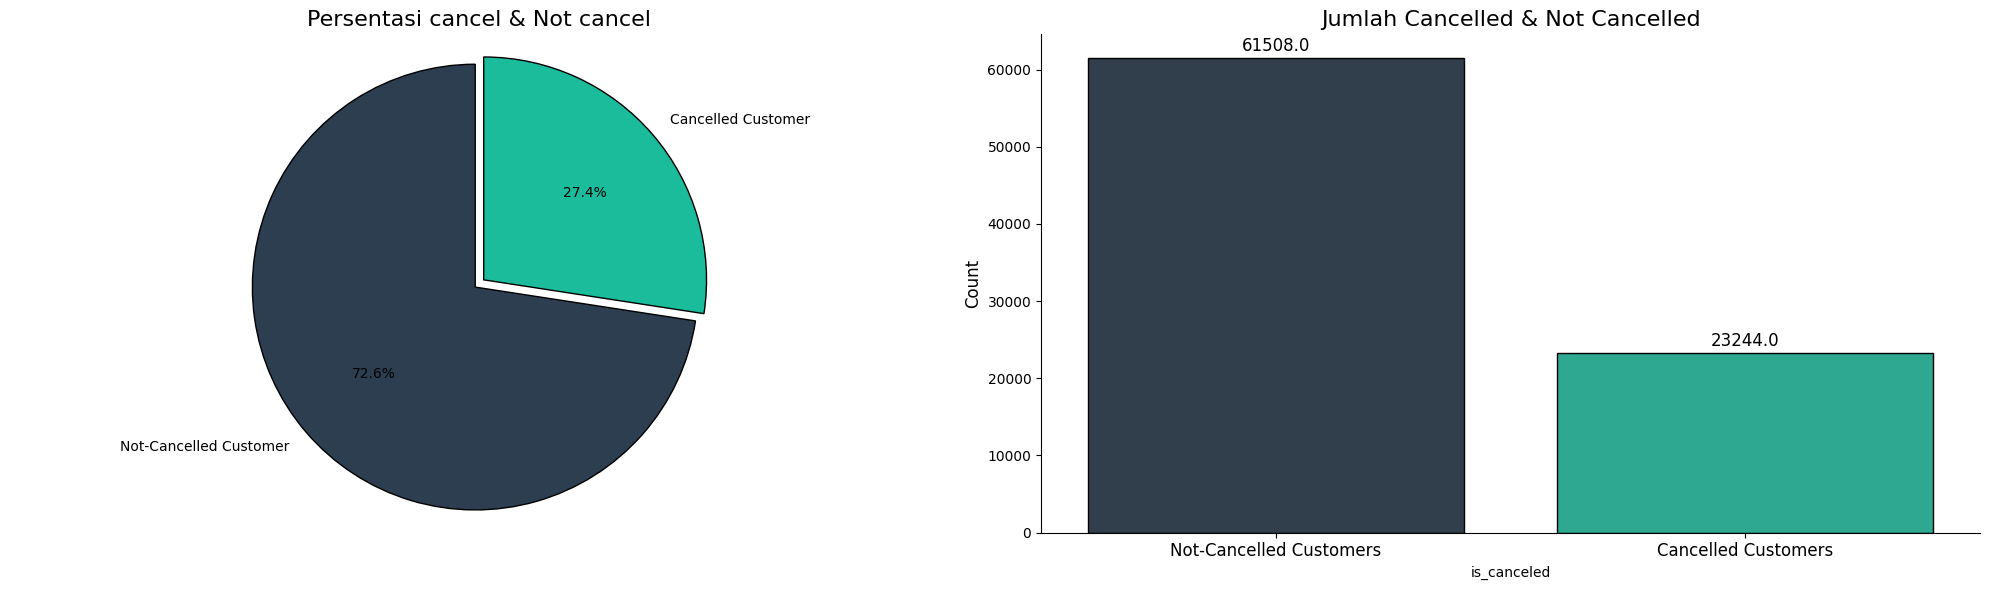

In [44]:
colors = ['#2C3E50','#1ABC9C']
# Hitung jumlah dan persentase cancel
hitung_cancel = data['is_canceled'].value_counts()
persentase_cancel = (hitung_cancel / hitung_cancel.sum()) * 100

# Buat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Pie chart untuk persentase cancel
axes[0].pie(
    persentase_cancel,
    labels=['Not-Cancelled Customer', 'Cancelled Customer'],
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05, 0],
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
axes[0].set_title('Persentasi cancel & Not cancel', fontsize=16)
axes[0].axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran

# Bar plot untuk jumlah cancel
sns.countplot(
    data=data,
    x='is_canceled',
    palette=colors,
    edgecolor='black',
    ax=axes[1]
)

# Menambahkan anotasi jumlah pada setiap bar
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height),
                     xytext=(0, 5), textcoords='offset points',
                     ha='center', fontsize=12)

# Mengatur label x-axis
axes[1].set_xticklabels(['Not-Cancelled Customers', 'Cancelled Customers'], fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Jumlah Cancelled & Not Cancelled', fontsize=16)

# Mengatur style keseluruhan
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

Bisa dilihat bahwa dataset tidak seimbang, 72.7% data adalah customer yang tidak melakukan pembatalan. Sedangkan data customer yang melakukan pembatalan hanya sebesar 27.3%.'





Setelah data dibersihkan kita dapat memulai analisis datanya, kita akan mulai dengan menghitung berapa jumlah pemesanan yang dibatalkan per hotel (City dan Resort).

### Berapa banyak pemesanan yang dibatalkan?

Berdasarkan grafik diatas yang menunjukkan ketidakseimbangan data, untuk mengetahui jumlah tamu sebenarnya, hanya pemesanan yang tidak dibatalkan yang dimasukkan.
Analisa dengan seluruh tamu akan ditampilkan terpisah.

**Hitung Jumlah Pesanan**

In [45]:
# Cek jumlah pembatalan untuk Resort Hotel dan City Hotel
# Pemesanan yang cancel juga dihitung
rh_total = data.loc[(data["hotel"] == "Resort Hotel")]
ch_total = data.loc[(data["hotel"] == "City Hotel")]

# Menghitung jumlah pesanan untuk Resort Hotel dan City Hotel
total_jumlah_rh = len(rh_total)
total_jumlah_ch = len(ch_total)

print("Jumlah pesanan untuk Resort Hotel:", total_jumlah_rh)
print("Jumlah pesanan untuk City Hotel:", total_jumlah_ch)

Jumlah pesanan untuk Resort Hotel: 33077
Jumlah pesanan untuk City Hotel: 51675


In [46]:
# Pemesanan yang dibatalkan tidak dimasukkan
rh = data.loc[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
ch = data.loc[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

# Menghitung jumlah pesanan sebenarnya untuk Resort Hotel dan City Hotel
jumlah_rh = len(rh)
jumlah_ch = len(ch)

print("Jumlah pesanan untuk Resort Hotel:", jumlah_rh)
print("Jumlah pesanan untuk City Hotel:", jumlah_ch)

Jumlah pesanan untuk Resort Hotel: 25233
Jumlah pesanan untuk City Hotel: 36275


**Hitung Jumlah Pembatalan**

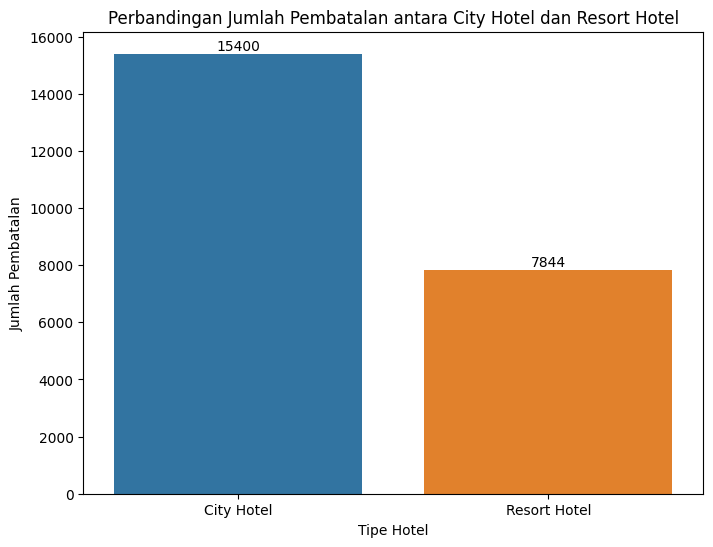

In [47]:
# Hitung jumlah pembatalan untuk City Hotel dan Resort Hotel
hotel_cancellations = data.groupby('hotel')['is_canceled'].sum()

# Buat bar plot dengan warna yang ditentukan
plt.figure(figsize=(8, 6))
sns.barplot(x=hotel_cancellations.index, y=hotel_cancellations.values, hue=hotel_cancellations.index,
            hue_order=["City Hotel", "Resort Hotel"])
plt.title('Perbandingan Jumlah Pembatalan antara City Hotel dan Resort Hotel')
plt.xlabel('Tipe Hotel')
plt.ylabel('Jumlah Pembatalan')

# Tampilkan angka di atas bar
for i, v in enumerate(hotel_cancellations.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


City hotel memiliki pembatalan yang signifikan dibandingkan dengan Resort Hotel. Dimana jumlah pembatalan pada City Hotel hampir 2 kali lipat dari jumlah Resort Hotel.

In [48]:
# Total pembatalan di semua hotel:
total_cancel = data["is_canceled"].sum()

# Filter data untuk masing-masing hotel
resort_hotel = data[data["hotel"] == "Resort Hotel"]
city_hotel = data[data["hotel"] == "City Hotel"]

# Hitung pembatalan
rh_cancel = resort_hotel["is_canceled"].sum()
ch_cancel = city_hotel["is_canceled"].sum()

# Persentase pembatalan dari total pembatalan
rh_rel_cancel = rh_cancel / total_cancel * 100
ch_rel_cancel = ch_cancel / total_cancel * 100

print(f"Total booking dibatalkan: {total_cancel:,}")
print(f"Resort hotel booking dibatalkan: {rh_cancel:,} ({rh_rel_cancel:.0f} % dari total pembatalan)")
print(f"City hotel booking dibatalkan: {ch_cancel:,} ({ch_rel_cancel:.0f} % dari total pembatalan)")

Total booking dibatalkan: 23,244
Resort hotel booking dibatalkan: 7,844 (34 % dari total pembatalan)
City hotel booking dibatalkan: 15,400 (66 % dari total pembatalan)




Dari output diatas, kita sudah mendapatkan gambaran jumlah pembatalan pesanan di kedua hotel yang dapat kita lanjutkan analisanya mengapa hal tersebut dapat terjadi.

Tingkat pembatalan yang lebih tinggi untuk hotel di kota (66%) dibandingkan dengan hotel resor (34%) mungkin disebabkan oleh beberapa alasan:





In [49]:
# Hitung rata-rata lead time untuk Resort Hotel dan City Hotel
avg_lead_time = data.groupby('hotel')['lead_time'].mean()

# Hitung jumlah pesanan dengan lead time kurang dari 7 hari
lead_time_kurang_dari_7 = data[data['lead_time'] < 7].groupby('hotel')['lead_time'].count()

# Tampilkan rata-rata lead time
for hotel, lead_time in avg_lead_time.items():
    print(f'Rata-rata lead time untuk {hotel}: {lead_time:.2f} hari')
    print(f'Jumlah pesanan dengan lead time kurang dari 7 hari di {hotel}: {lead_time_kurang_dari_7[hotel]}')


Rata-rata lead time untuk City Hotel: 74.11 hari
Jumlah pesanan dengan lead time kurang dari 7 hari di City Hotel: 8901
Rata-rata lead time untuk Resort Hotel: 81.19 hari
Jumlah pesanan dengan lead time kurang dari 7 hari di Resort Hotel: 7725


**Berapa lama tamu menginap di hotel?**

Statistik lama menginap di Hotel Resort:
Rata-rata: 4.14 malam
Minimum: 1 malam
Maksimum: 15 malam

Statistik lama menginap di Hotel Kota:
Rata-rata: 2.99 malam
Minimum: 1 malam
Maksimum: 15 malam



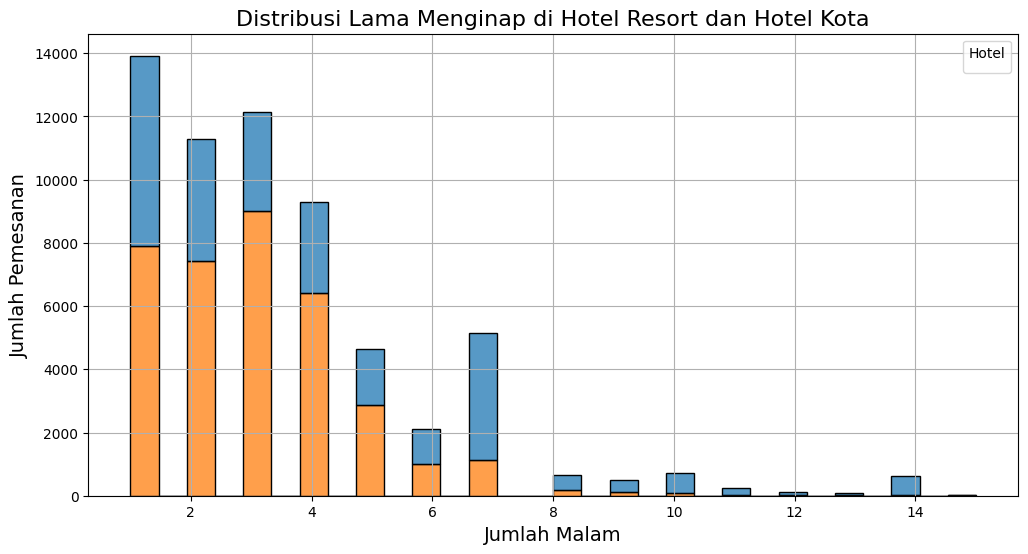

In [50]:
# Menghitung total malam menginap untuk Resort dan City hotel
rh_copy = rh.copy()
ch_copy = ch.copy()

# Menghitung total malam menginap
rh_copy["total_malam"] = rh_copy["stays_in_weekend_nights"] + rh_copy["stays_in_week_nights"]
ch_copy["total_malam"] = ch_copy["stays_in_weekend_nights"] + ch_copy["stays_in_week_nights"]

# Menghitung statistik untuk Resort Hotel
rata_rh = rh_copy["total_malam"].mean()
min_rh = rh_copy["total_malam"].min()
max_rh = rh_copy["total_malam"].max()

# Menghitung statistik untuk City Hotel
rata_ch = ch_copy["total_malam"].mean()
min_ch = ch_copy["total_malam"].min()
max_ch = ch_copy["total_malam"].max()

# Menampilkan hasil
print(f"Statistik lama menginap di Hotel Resort:")
print(f"Rata-rata: {rata_rh:.2f} malam")
print(f"Minimum: {min_rh} malam")
print(f"Maksimum: {max_rh} malam\n")

print(f"Statistik lama menginap di Hotel Kota:")
print(f"Rata-rata: {rata_ch:.2f} malam")
print(f"Minimum: {min_ch} malam")
print(f"Maksimum: {max_ch} malam\n")

# Persiapan data untuk plotting (membuat histogram dari total malam menginap)
# Menggabungkan kedua dataset untuk visualisasi
rh_copy["hotel"] = "Hotel Resort"
ch_copy["hotel"] = "Hotel Kota"
combined_data = pd.concat([rh_copy, ch_copy])

# Membuat histogram lama menginap untuk Resort dan City Hotel
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x="total_malam", hue="hotel", multiple="stack", kde=False, bins=30)
plt.title("Distribusi Lama Menginap di Hotel Resort dan Hotel Kota", fontsize=16)
plt.xlabel("Jumlah Malam", fontsize=14)
plt.ylabel("Jumlah Pemesanan", fontsize=14)
plt.legend(title="Hotel", loc="upper right")
plt.grid(True)
plt.show()

Untuk City Hotel, kebanyakan tamu menginap 1 sampai 4 malam.

Untuk Hotel Resort, 1-4 malam juga sering dipesan sama seperti city hotel, tetapi menginap 7 malam juga banyak dipesan.


- Business: City Hotel mungkin menarik lebih banyak tamu yang bertujuan untuk bisnis yang rentan terhadap perubahan rencana mendadak karena pertemuan, konferensi, atau jadwal kerja.

- Lisure: Resort Hotel yang lebih mengakomodasi tamu yang ingin berlibur, mungkin mengalami lebih sedikit pembatalan karena rencana liburan cenderung lebih stabil.


**Saran untuk mengatasi:**


- Pemasaran Target: Hotel-hotel di kota dapat menargetkan segmen yang tahan terhadap pembatalan, seperti tamu yang menginap dalam jangka waktu lama atau wisatawan rekreasi dengan rencana perencanaan yang lebih panjang.

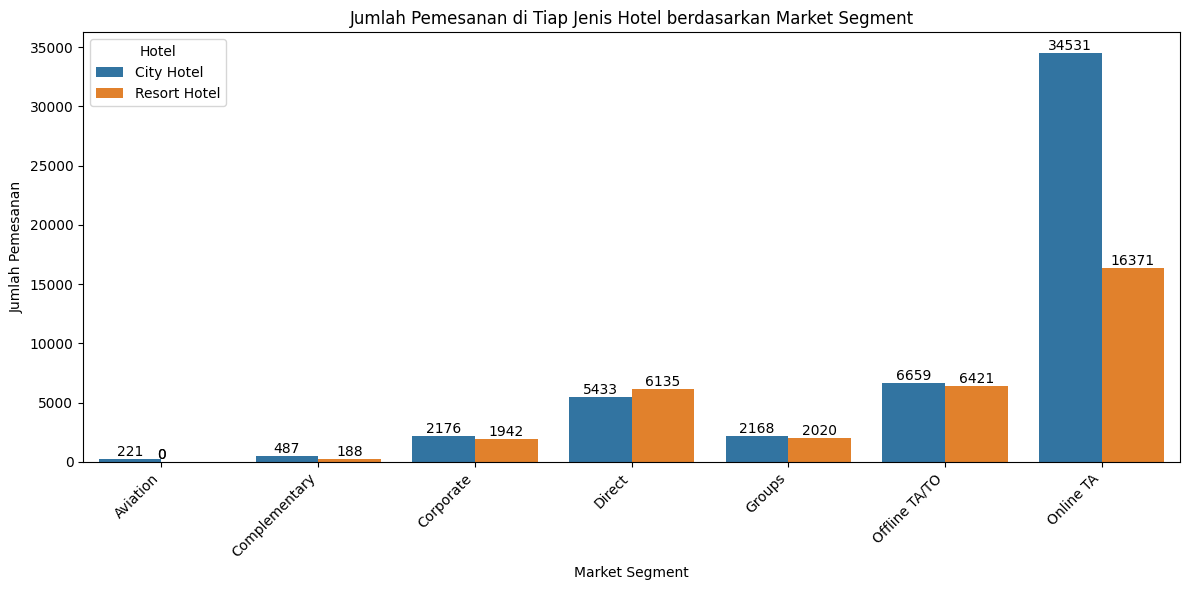

In [51]:
# Hitung jumlah pemesanan per hotel dan market segment
segment_counts = data.groupby(['hotel', 'market_segment'])['market_segment'].count()

# Ubah data menjadi DataFrame dan reset index
segment_counts = segment_counts.to_frame().rename(columns={'market_segment': 'jumlah_pemesanan'}).reset_index()

# Buat bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='market_segment', y='jumlah_pemesanan', hue='hotel', data=segment_counts)
plt.title('Jumlah Pemesanan di Tiap Jenis Hotel berdasarkan Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Jumlah Pemesanan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Hotel')

# Tampilkan angka di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, Online TA berkontribusi paling besar dalam menyumbang jumlah pemesanan hotel.

Apakah pemasaran dapat lebih difokuskan  pada Online TA?

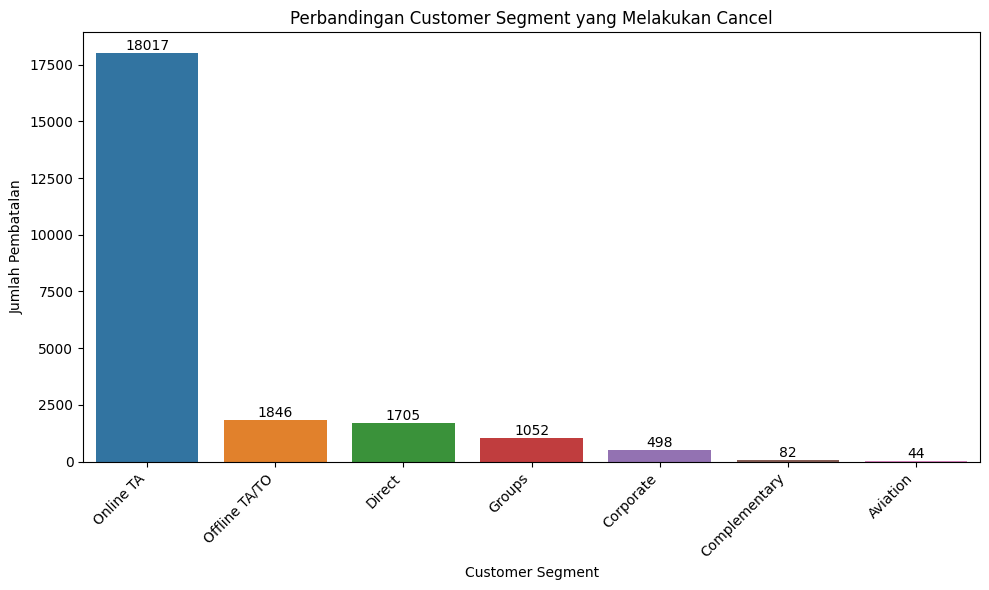

In [52]:
# Filter data untuk customer yang melakukan cancel
canceled_data = data[data['is_canceled'] == 1]

# Hitung jumlah pembatalan per customer segment
segment_cancellations = canceled_data['market_segment'].value_counts()

# Buat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_cancellations.index, y=segment_cancellations.values)
sns.barplot(x=segment_cancellations.index, y=segment_cancellations.values, hue=segment_cancellations.index)
plt.title('Perbandingan Jumlah Pembatalan antara City Hotel dan Resort Hotel')
plt.title('Perbandingan Customer Segment yang Melakukan Cancel')
plt.xlabel('Customer Segment')
plt.ylabel('Jumlah Pembatalan')
plt.xticks(rotation=45, ha='right')

# Tampilkan angka di atas bar
for i, v in enumerate(segment_cancellations.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Ternyata customer yang paling banyak melakukan cancel paling banyak pada platform Online TA. Itu wajar karena jumlah pemesanan lewat Online TA juga yang paling banyak.

Coba kita lihat berdasarkan persentasenya. Manakah persentase paling besar yang melakukan cancel?

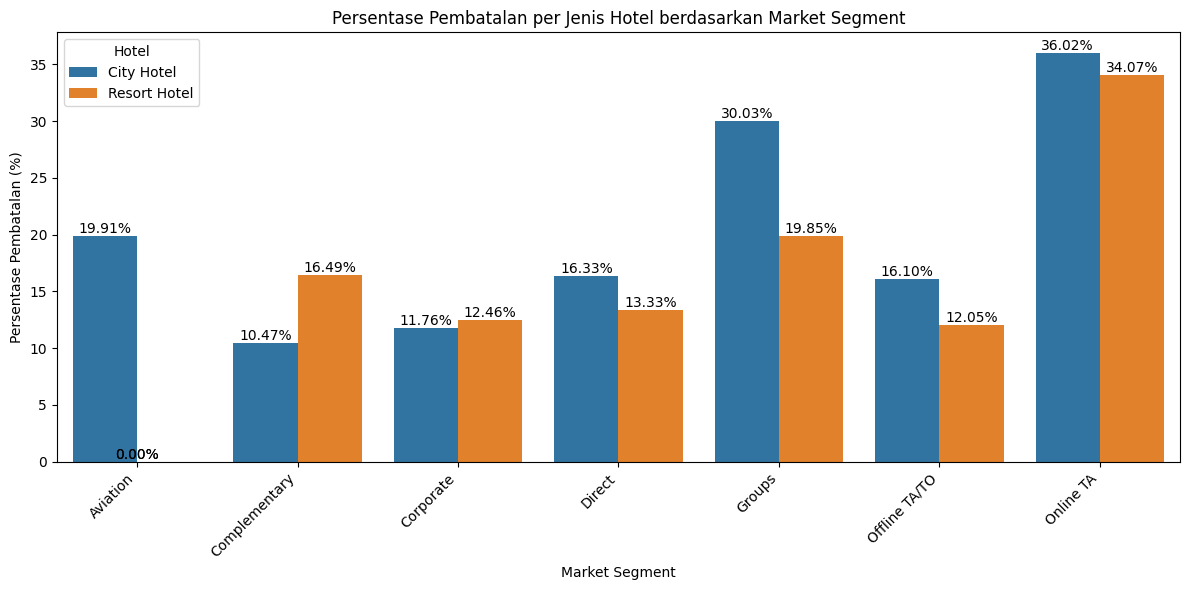

In [53]:
# Hitung jumlah pemesanan dan pembatalan
bookings = data.groupby(['hotel', 'market_segment'])['is_canceled'].count().reset_index(name='jumlah_pemesanan')
cancellations = data.groupby(['hotel', 'market_segment'])['is_canceled'].sum().reset_index(name='jumlah_pembatalan')

# Gabungkan data pemesanan dan pembatalan
merged_data = pd.merge(bookings, cancellations, on=['hotel', 'market_segment'])

# Hitung persentase pembatalan
merged_data['persentase_pembatalan'] = (merged_data['jumlah_pembatalan'] / merged_data['jumlah_pemesanan']) * 100

# Buat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='persentase_pembatalan', hue='hotel', data=merged_data)
plt.title('Persentase Pembatalan per Jenis Hotel berdasarkan Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Persentase Pembatalan (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Hotel')

# Tampilkan angka di atas bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Dari grafik diatas:
- Jumlah pembatalan terbanyak masih dipegang oleh Online TA untuk kedua jenis hotel.
- Segmen pasar 'groups' juga tinggi untuk tingkat pembatalan pada City Hotel tetapi cukup rendah (<20%) untuk Resort Hotel.
- Pada Offline TA/TO, Direct, Corporate, Complementary, dan Aviation memiliki persentase yang terbilang rendah untuk cancel dari semua pemesanan untuk kedua Hotel.

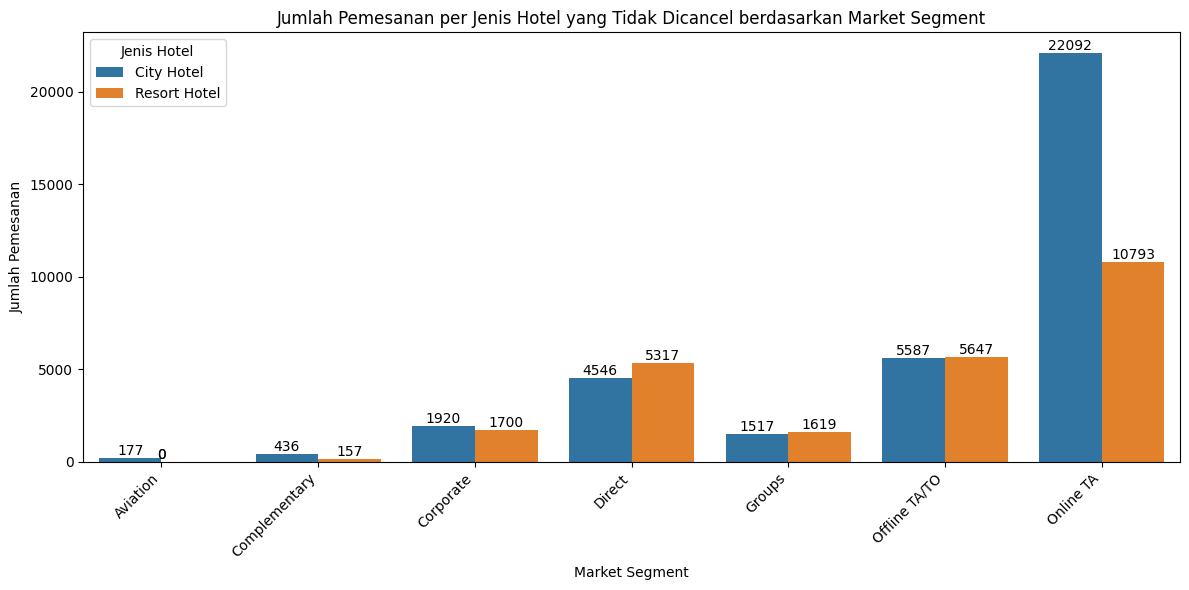

In [54]:
# Filter data untuk pesanan yang tidak dicancel
not_canceled_data = data[data['is_canceled'] == 0]

# Hitung jumlah pesanan per jenis hotel dan market segment
segment_counts = not_canceled_data.groupby(['hotel', 'market_segment'])['hotel'].count().reset_index(name='jumlah')

# Buat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='jumlah', hue='hotel', data=segment_counts)
plt.title('Jumlah Pemesanan per Jenis Hotel yang Tidak Dicancel berdasarkan Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Jumlah Pemesanan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Jenis Hotel')

# Tampilkan angka di atas bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Dari grafik diatas, target pemasaran hotel dapat dilakukan

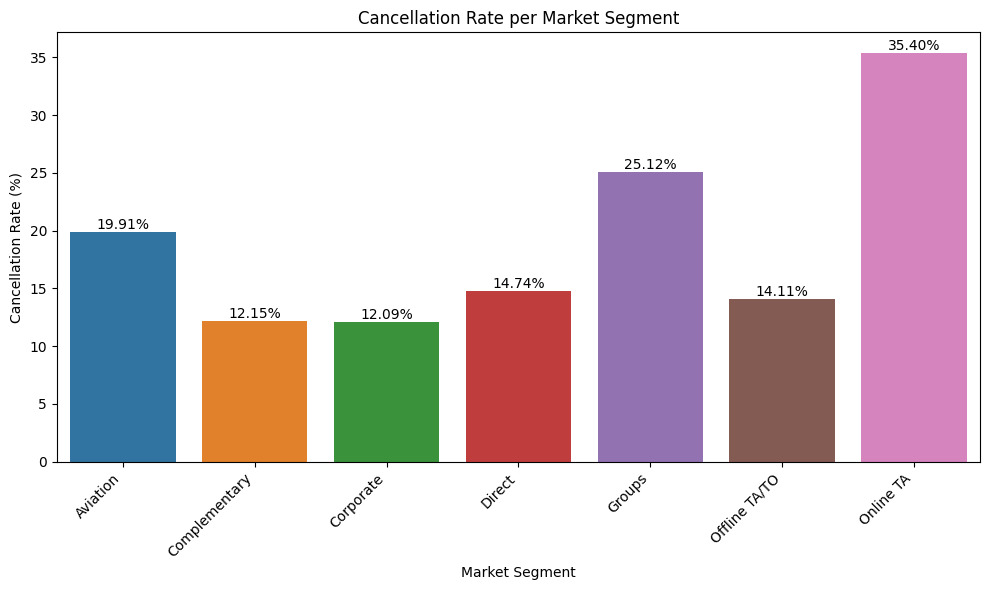

In [55]:
# Hitung total pemesanan per market segment
total_bookings_per_segment = data.groupby('market_segment')['is_canceled'].count()

# Hitung jumlah pemesanan yang dibatalkan per market segment
canceled_bookings_per_segment = data.groupby('market_segment')['is_canceled'].sum()

# Hitung cancellation rate
cancellation_rate = (canceled_bookings_per_segment / total_bookings_per_segment) * 100

# Buat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, hue=cancellation_rate.index)
plt.title('Cancellation Rate per Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45, ha='right')

# Tampilkan angka di atas bar
for i, v in enumerate(cancellation_rate.values):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Kesimpulan:**

- Segmen Corporate memiliki Cancellation Rate terendah (12.09%) dan stabilitas yang baik. Meskipun jumlah pemesanan di segmen ini tidak sebanyak segmen Online TA, stabilitas yang lebih tinggi membuat segmen ini menarik untuk difokuskan pada promosi.
- Segmen Offline TA/TO juga memiliki Cancellation Rate yang rendah (14.11%), menunjukkan segmen ini juga cukup stabil untuk difokuskan dalam strategi pemasaran.
- Online TA memiliki Cancellation Rate tertinggi (35.39%), meskipun memiliki jumlah pemesanan yang besar. Promosi mungkin harus lebih berhati-hati di segmen ini, dengan fokus pada strategi untuk mengurangi pembatalan, seperti kebijakan non-refundable atau fleksibilitas dalam perubahan tanggal.

**Strategi Promosi:**

Fokus pada segmen dengan Cancellation Rate rendah:
- Prioritaskan promosi untuk Corporate dan Offline TA/TO, karena lebih stabil dan memiliki Cancellation Rate rendah.

Segmentasi Khusus: Untuk Online TA, terapkan strategi untuk mengurangi pembatalan, seperti:
- Menawarkan diskon untuk pemesanan non-refundable.
- Memberikan insentif untuk pemesanan jangka panjang.

**Tambahan Strategi Menghindari Cancellation Berdasarkan Problem lead-time:**
- Pembayaran di muka dan diskon: Mendorong tamu untuk membayar di muka atau menawarkan diskon yang tidak dapat dikembalikan dapat mengurangi kemungkinan pembatalan.

- Kebijakan pembatalan yang fleksibel: Hotel-hotel di kota dapat menawarkan kebijakan pembatalan yang fleksibel untuk mengakomodasi perubahan rencana perjalanan, mendorong tamu untuk menghindari pembatalan mendadak.


Sebaran tamu (%) yang tidak cancel berdasarkan negara asalnya.

In [56]:
# Mendapatkan jumlah tamu yang tidak cancel berdasarkan negara
country_data = data.loc[data["is_canceled"] == 0]["country"].value_counts().reset_index()

# Ubah nama kolom
country_data.columns = ["country", "Jumlah Customer"]

# Hitung persentase customer berdasarkan negara.
total_guests = country_data["Jumlah Customer"].sum()
country_data["Customer dalam %"] = round(country_data["Jumlah Customer"] / total_guests * 100, 2)

# Kelompokkan negara-negara kecil di bawah 'Lainnya'.
country_data.loc[country_data["Customer dalam %"] < 2, "country"] = "Lainnya"

# Pie plot
fig = px.pie(country_data,
             values="Jumlah Customer",
             names="country",
             title="Negara Asal Customer Tidak Cancel",
             template="seaborn")

# Perbarui trace untuk menampilkan nilai, persentase, dan label.
fig.update_traces(textposition="inside", textinfo="value+percent+label")

# Tampilkan plot
fig.show()


In [57]:
# Mendapatkan jumlah tamu yang cancel berdasarkan negara
country_data = data.loc[data["is_canceled"] == 1]["country"].value_counts().reset_index()

# Ubah nama kolom
country_data.columns = ["country", "Jumlah Customer"]

# Hitung persentase customer berdasarkan negara.
total_guests = country_data["Jumlah Customer"].sum()
country_data["Customer dalam %"] = round(country_data["Jumlah Customer"] / total_guests * 100, 2)

# Kelompokkan negara-negara kecil di bawah 'Lainnya'.
country_data.loc[country_data["Customer dalam %"] < 2, "country"] = "Lainnya"

# Pie plot
fig = px.pie(country_data,
             values="Jumlah Customer",
             names="country",
             title="Negara Asal Customer Cancel",
             template="seaborn")

# Perbarui trace untuk menampilkan nilai, persentase, dan label.
fig.update_traces(textposition="inside", textinfo="value+percent+label")

# Tampilkan plot
fig.show()

### Berapa tamu membayar untuk satu kamar per malam?

Kedua hotel memiliki jenis kamar yang berbeda dan pelayanan yang berbeda. Faktor musiman juga penting. Jadi harga dapat bervariasi.

Karena tidak ada informasi mata uang yang diberikan, diasumsikan bahwa semua harga dalam USD.

In [58]:
# Memastikan untuk modifikasi dengan salinan DataFrame rh dan ch.
rh_copy = rh.copy()
ch_copy = ch.copy()

# Hindari pembagian dengan nol dengan menggantikan 0 dengan NaN dalam jumlah orang dewasa dan anak-anak.
rh_copy["total_customers"] = rh_copy["adults"] + rh_copy["children"]
ch_copy["total_customers"] = ch_copy["adults"] + ch_copy["children"]

# Hitung ADR per orang yang membayar hanya ketika ada pelanggan yang membayar (dewasa + anak-anak > 0).
rh_copy["adr_pp"] = rh_copy["adr"] / rh_copy["total_customers"].replace(0, np.nan)
ch_copy["adr_pp"] = ch_copy["adr"] / ch_copy["total_customers"].replace(0, np.nan)

# Hapus kolom 'total_customers' setelah perhitungan jika tidak diperlukan.
rh_copy.drop(columns=["total_customers"], inplace=True)
ch_copy.drop(columns=["total_customers"], inplace=True)


In [59]:
# Filter untuk hanya menyertakan baris dengan jumlah tamu > 0
rh_valid = rh_copy[rh_copy["adults"] + rh_copy["children"] > 0] # Use rh_copy that contains the 'adr_pp' column
ch_valid = ch_copy[ch_copy["adults"] + ch_copy["children"] > 0] # Use ch_copy that contains the 'adr_pp' column

# Cetak hasil dengan rata-rata adr_pp
print("""Dari semua pemesanan yang tidak dibatalkan, di semua tipe kamar dan makanan, harga rata-rata adalah:
Resort hotel: {:.2f} $ per malam dan per orang.
City hotel: {:.2f} $ per malam dan per orang.""".format(rh_valid["adr_pp"].mean(), ch_valid["adr_pp"].mean()))

Dari semua pemesanan yang tidak dibatalkan, di semua tipe kamar dan makanan, harga rata-rata adalah:
Resort hotel: 48.92 $ per malam dan per orang.
City hotel: 60.01 $ per malam dan per orang.


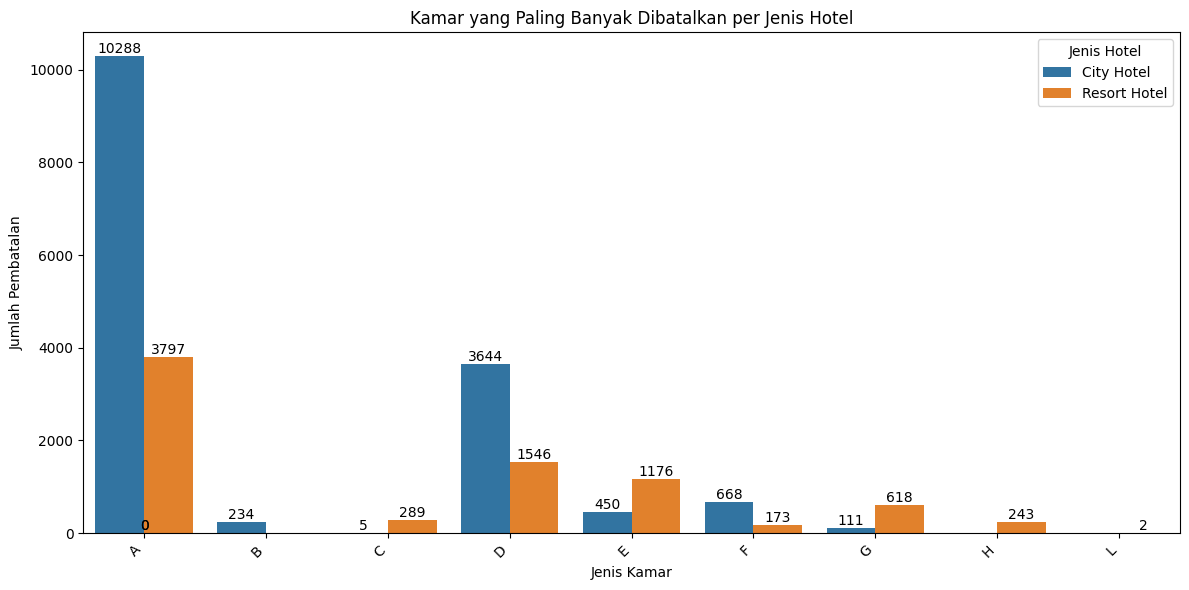

In [60]:
# Filter data untuk pemesanan yang dibatalkan
canceled_bookings = data[data['is_canceled'] == 1]

# Hitung jumlah pembatalan untuk setiap jenis kamar per jenis hotel
room_cancellations = canceled_bookings.groupby(['hotel', 'reserved_room_type'])['reserved_room_type'].count().reset_index(name='jumlah')

# Buat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='reserved_room_type', y='jumlah', hue='hotel', data=room_cancellations)
plt.title('Kamar yang Paling Banyak Dibatalkan per Jenis Hotel')
plt.xlabel('Jenis Kamar')
plt.ylabel('Jumlah Pembatalan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Jenis Hotel')

# Tampilkan angka di atas bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Karena kita telah mengetahui jumlah kamar yang dibatalkan, kita coba cek apakah ada perbedaan signifikan antara harga rata-rata semua kamar dan harga rata-rata kamar yang dibatalkan, kita dapat menghitung rata-rata harga per malam per orang (ADR) untuk:

1. Semua kamar yang tidak dibatalkan.
2. Semua kamar yang dibatalkan.

**Uji statistik (t-test)**

Untuk membandingkan kedua harga rata-rata tersebut guna melihat apakah perbedaan tersebut signifikan.
- Jika p-value < 0.05, kita bisa menyimpulkan bahwa ada perbedaan signifikan antara harga rata-rata kamar yang dibatalkan dan yang tidak dibatalkan.
- Jika p-value ≥ 0.05, perbedaan harga rata-rata tidak signifikan secara statistik.

In [61]:
# Normalisasi harga per malam (ADR) per orang,
# normalize price per night (adr):
data["adr_pp"] = data["adr"] / (data["adults"] + data["children"])

# Data pemesanan yang tidak dibatalkan
no_cancel = data.loc[data["is_canceled"] == 0]["adr_pp"]

# Data pemesanan yang dibatalkan
cancel = data.loc[data["is_canceled"] == 1]["adr_pp"]

# Hitung harga rata-rata untuk pemesanan yang dibatalkan dan tidak dibatalkan
avg_no_cancel = no_cancel.mean()
avg_cancel = cancel.mean()

print(f"Harga rata-rata kamar yang tidak dibatalkan: {avg_no_cancel:.2f}")
print(f"Harga rata-rata kamar yang dibatalkan: {avg_cancel:.2f}")

# Uji t-test untuk membandingkan harga rata-rata
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(no_cancel.dropna(), cancel.dropna(), equal_var=False)
print(f"T-statistik: {t_stat:.2f}, P-value: {p_value:.4f}")


Harga rata-rata kamar yang tidak dibatalkan: 55.46
Harga rata-rata kamar yang dibatalkan: 58.57
T-statistik: -12.88, P-value: 0.0000


Meskipun perbedaannya terlihat kecil secara angka (selisih sekitar 3.11 USD), perbedaan ini ternyata secara statistik signifikan.

Ini menunjukkan bahwa kamar dengan harga lebih tinggi cenderung memiliki tingkat pembatalan yang lebih tinggi dibandingkan kamar dengan harga lebih rendah.

**Kemungkinan:**
- Kamar yang lebih mahal mungkin dipesan oleh pelanggan yang lebih sensitif terhadap faktor eksternal seperti perubahan rencana, pengeluaran tak terduga, atau beralih ke penawaran lebih murah di tempat lain.
- Pelanggan mungkin lebih cepat membatalkan pemesanan kamar mahal karena pertimbangan biaya, atau karena mereka merasa terburu-buru mengambil keputusan saat memesan kamar mahal.

**Pengaruh Waktu Pembatalan terhadap Harga Kamar yang Dibatalkan:**

Untuk mengetahui apakah waktu pembatalan memengaruhi harga kamar yang dibatalkan, kita perlu melihat hubungan antara waktu pembatalan (berapa hari sebelum check-in) dan harga kamar yang dibatalkan.

Jika korelasi mendekati 1: Ada hubungan kuat antara waktu pembatalan dan harga kamar yang dibatalkan. Jika korelasi positif, berarti semakin dekat dengan tanggal check-in, harga kamar yang dibatalkan lebih tinggi.

Jika korelasi mendekati 0: Tidak ada hubungan yang jelas antara waktu pembatalan dan harga.

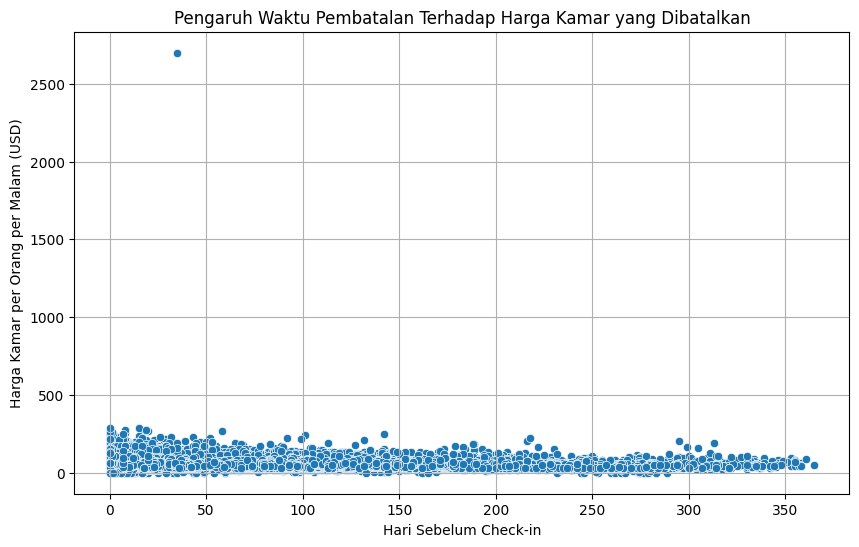

Korelasi antara waktu pembatalan dan harga kamar yang dibatalkan: -0.06


In [62]:
# Buat kolom baru untuk menghitung jumlah hari sebelum check-in
data["days_before_checkin"] = (data["arrival_date_year"].astype(str) + "-" +
                               data["arrival_date_month"].astype(str) + "-" +
                               data["arrival_date_day_of_month"].astype(str))
data["days_before_checkin"] = pd.to_datetime(data["days_before_checkin"], format="%Y-%B-%d")

# Asumsikan ada kolom 'reservation_status_date' yang berisi tanggal pembatalan
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"])

# Hitung berapa hari sebelum check-in pembatalan dilakukan
data["days_canceled_before_checkin"] = (data["days_before_checkin"] - data["reservation_status_date"]).dt.days

# Filter hanya data pembatalan
cancel_data = data.loc[data["is_canceled"] == 1]

# Plot hubungan antara waktu pembatalan dan harga kamar yang dibatalkan
plt.figure(figsize=(10, 6))
sns.scatterplot(x="days_canceled_before_checkin", y="adr_pp", data=cancel_data)
plt.title("Pengaruh Waktu Pembatalan Terhadap Harga Kamar yang Dibatalkan")
plt.xlabel("Hari Sebelum Check-in")
plt.ylabel("Harga Kamar per Orang per Malam (USD)")
plt.grid(True)
plt.show()

# Hitung korelasi antara waktu pembatalan dan harga kamar
corr = cancel_data[["days_canceled_before_checkin", "adr_pp"]].corr().iloc[0, 1]
print(f"Korelasi antara waktu pembatalan dan harga kamar yang dibatalkan: {corr:.2f}")


- Korelasi sebesar -0.06 menunjukkan hubungan negatif yang sangat lemah antara waktu pembatalan dan harga kamar.
- Ini berarti bahwa waktu pembatalan tidak memiliki pengaruh signifikan terhadap harga kamar. Meskipun ada sedikit kecenderungan bahwa kamar yang dibatalkan lebih mendekati tanggal check-in mungkin sedikit lebih murah, hubungan ini sangat lemah dan tidak signifikan.

**Kemungkinan:**

- Harga kamar mungkin tidak selalu terkait dengan kapan pelanggan memutuskan untuk membatalkan. Faktor-faktor lain seperti perubahan rencana atau preferensi mungkin lebih berperan.
- Pelanggan mungkin merasa terburu-buru membatalkan tidak peduli berapa harga kamar, selama rencana perjalanan mereka berubah.

**Saran untuk mengatasi:**

- Kebijakan pembatalan ketat: Hotel dapat menerapkan kebijakan pembatalan yang lebih ketat untuk kamar yang lebih mahal, seperti jangka waktu pembatalan yang lebih lama, biaya pembatalan lebih tinggi, atau menawarkan diskon jika reservasi sudah pasti.
- Pemberian insentif: Hotel bisa memberikan insentif kepada pelanggan untuk tidak membatalkan, seperti diskon tambahan jika reservasi dipastikan atau fleksibilitas dalam perubahan tanggal.

### Bagaimana variasi harga kamar yang dibatalkan per malam selama setahun?





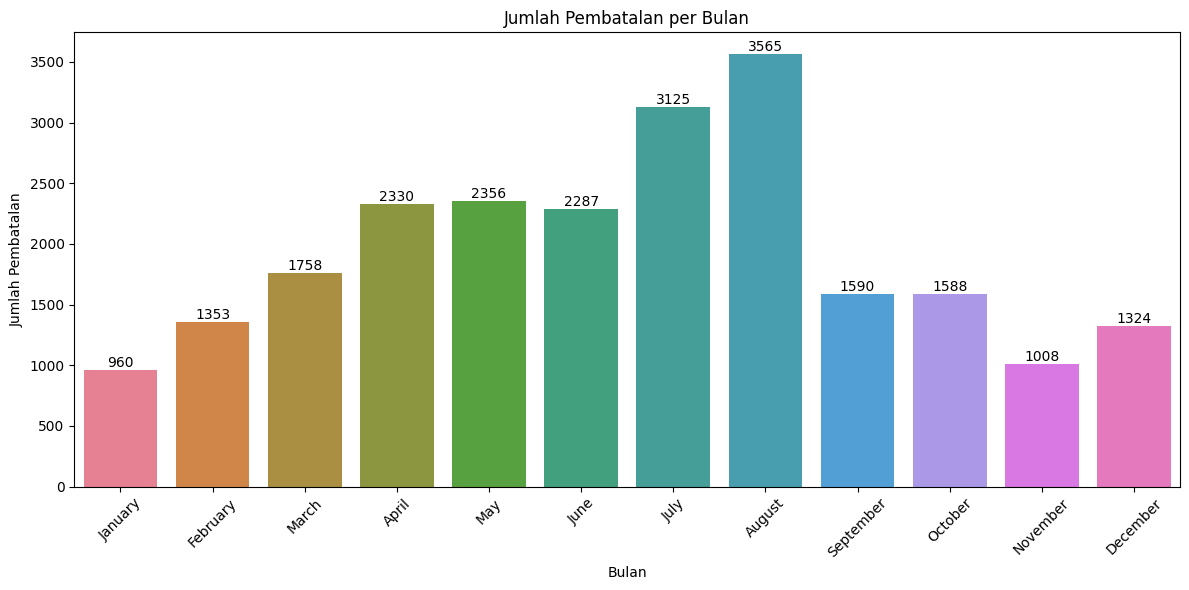

In [63]:
# Filter data untuk pesanan yang dicancel
canceled_data = data[data['is_canceled'] == 1]

# Hitung jumlah pembatalan per bulan
monthly_cancellations = canceled_data.groupby('arrival_date_month')['is_canceled'].count()

# Urutkan bulan
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_cancellations = monthly_cancellations.reindex(months)

# Buat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_cancellations.index, y=monthly_cancellations.values, hue=monthly_cancellations.index)
plt.title('Jumlah Pembatalan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembatalan')
plt.xticks(rotation=45)

# Tampilkan angka di atas bar
for i, v in enumerate(monthly_cancellations.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

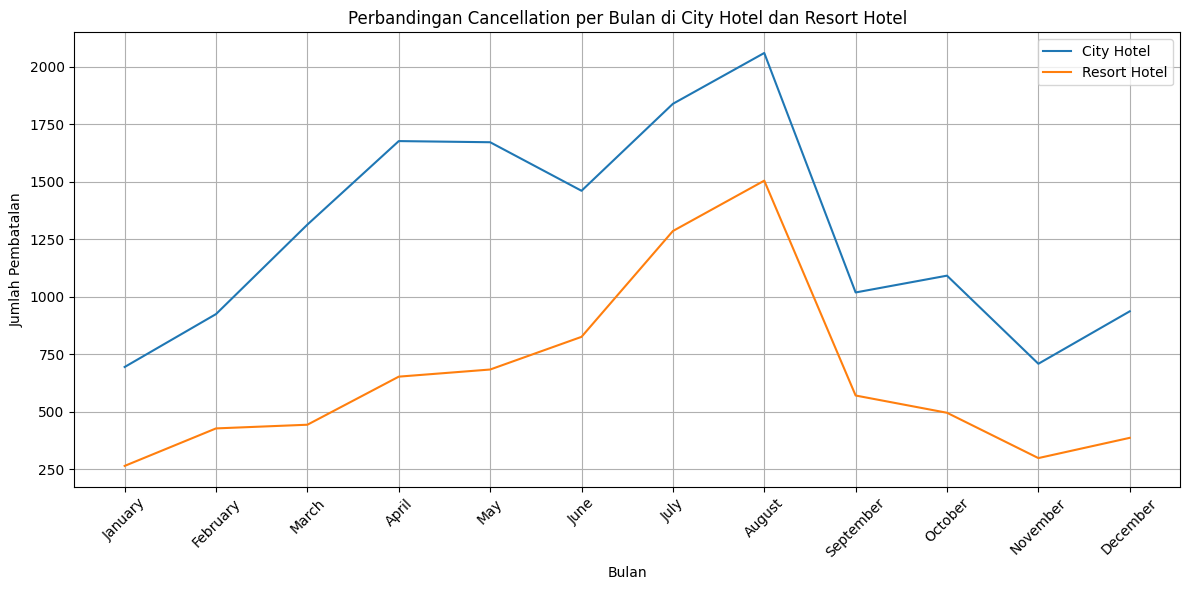

In [64]:
# Filter data untuk City Hotel dan Resort Hotel
city_hotel = data[data['hotel'] == 'City Hotel']
resort_hotel = data[data['hotel'] == 'Resort Hotel']

# Hitung jumlah pembatalan per bulan untuk City Hotel
city_cancellations = city_hotel.groupby('arrival_date_month')['is_canceled'].sum()

# Hitung jumlah pembatalan per bulan untuk Resort Hotel
resort_cancellations = resort_hotel.groupby('arrival_date_month')['is_canceled'].sum()

# Urutkan bulan
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
city_cancellations = city_cancellations.reindex(months)
resort_cancellations = resort_cancellations.reindex(months)

# Buat grafik
plt.figure(figsize=(12, 6))
plt.plot(city_cancellations.index, city_cancellations.values, label='City Hotel')
plt.plot(resort_cancellations.index, resort_cancellations.values, label='Resort Hotel')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembatalan')
plt.title('Perbandingan Cancellation per Bulan di City Hotel dan Resort Hotel')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Dapat dilihat bahwa jumlah pembatalan pada city hotel dan resort hotel serupa.

Pembatalan terbanyak terjadi pada bulan juni - agustus untuk kedua hotel.

Pada City Hotel grafik menunjukkan naik dimulai pada bulan februari - april. Sedangkan pada resort hotel mengalami kenaikan yang tidak signifikan sampai bulan juni



Selanjutnya kita cek bentuk grafik harga kamar per malam dan per orang yang dibatalkan.

Agar mudah, kita menggunakan harga rata-rata per malam dan per orang, tanpa memperhatikan jenis kamar dan makanan.

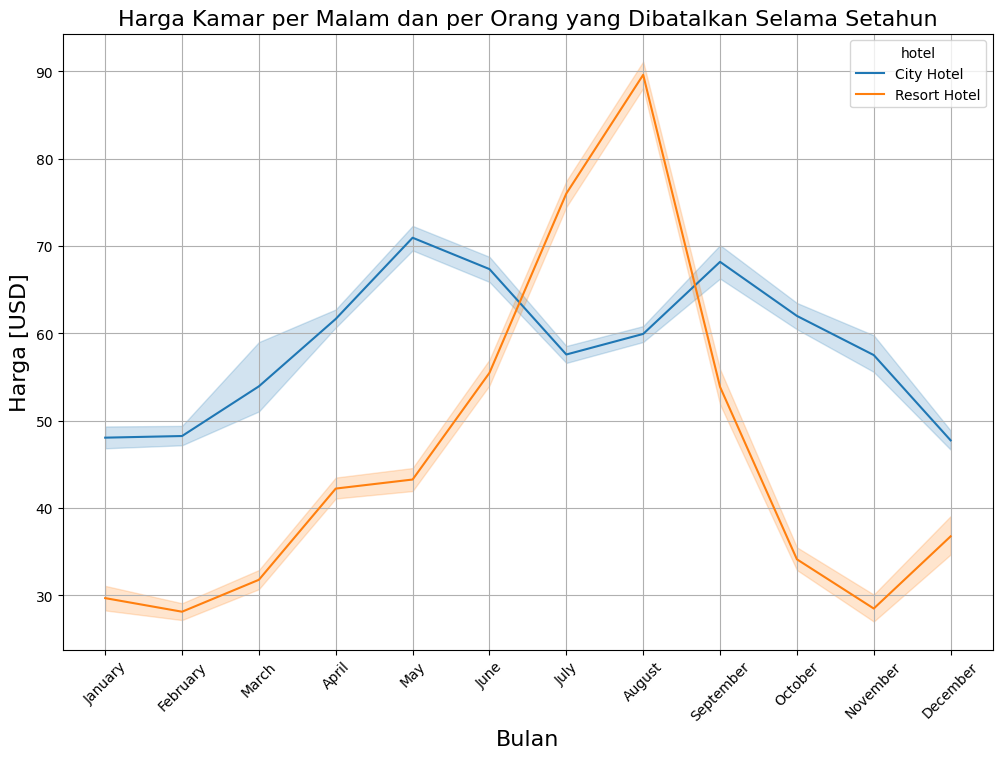

In [65]:
# Filter hanya untuk customer yang membatalkan pesanan
room_prices_monthly_canceled = data.loc[data["is_canceled"] == 1, ["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# Urutkan nama bulan
ordered_months = ["January", "February", "March", "April", "May", "June",
                  "July", "August", "September", "October", "November", "December"]
room_prices_monthly_canceled["arrival_date_month"] = pd.Categorical(room_prices_monthly_canceled["arrival_date_month"],
                                                                    categories=ordered_months, ordered=True)

# Menghilangkan value kosong di 'adr_pp' jika ada
room_prices_monthly_canceled = room_prices_monthly_canceled.dropna(subset=["adr_pp"])

# Barplot
plt.figure(figsize=(12, 8))
sns.lineplot(x="arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_monthly_canceled,
             hue_order=["City Hotel", "Resort Hotel"])
plt.title("Harga Kamar per Malam dan per Orang yang Dibatalkan Selama Setahun", fontsize=16)
plt.xlabel("Bulan", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Harga [USD]", fontsize=16)
plt.grid(True)
plt.show()


Ini jelas menunjukkan bahwa harga di Resort Hotel jauh lebih tinggi selama musim panas (Mei-Agustus).

Harga City Hotel bervariasi lebih sedikit dan paling mahal selama musim semi (Maret-Mei) dan musim gugur (Agustus-September).

Perubahan musim bisa dibilang mempengaruhi harga hotel. Dimana mendekati musim panas harga akan meningkat dimana harga kamar juga akan meningkat yang menyebabkan tingkat cancellation yang besar juga.

City Hotel memiliki **lebih banyak tamu** selama musim semi dan musim gugur, ketika harga paling tinggi.

Pada bulan Juli dan Agustus, ada **lebih sedikit pengunjung**, meskipun harga lebih rendah.

Jumlah tamu untuk Resort Hotel **sedikit menurun** dari bulan Juni hingga September, dimana harga paling tinggi.

Kedua hotel memiliki jumlah tamu terendah selama musim dingin.

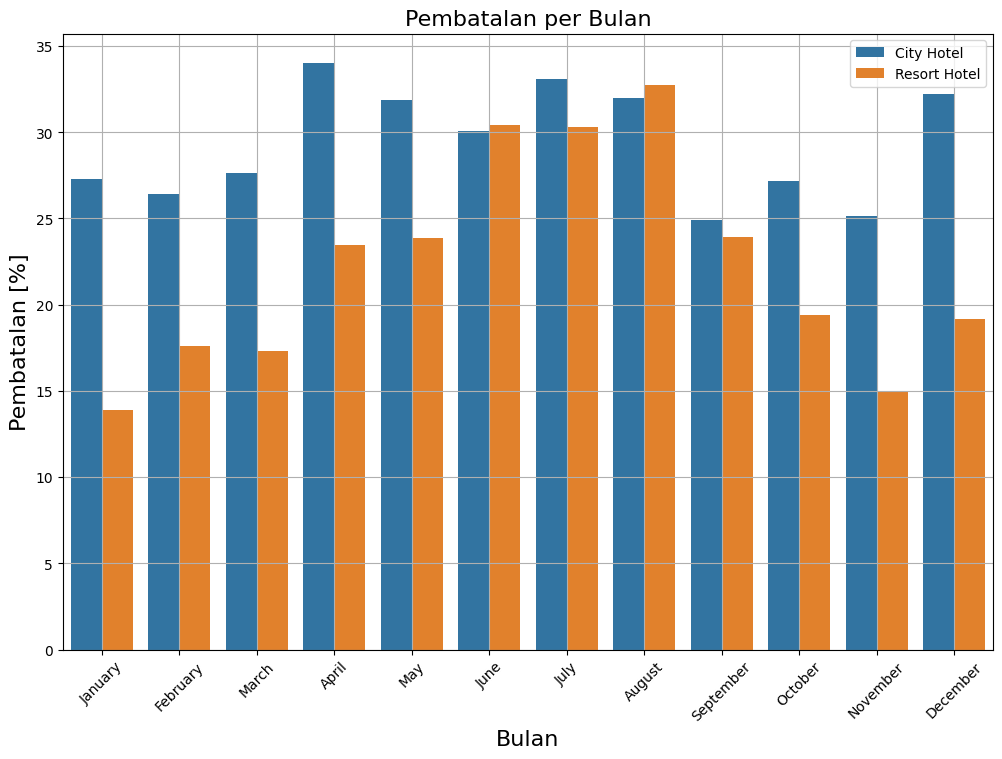

In [66]:
# Create a DateFrame with the relevant data:
res_book_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Bulan": list(res_book_per_month.index),
                                "Booking": list(res_book_per_month.values),
                                "Pembatalan": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Bulan": list(cty_book_per_month.index),
                                "Booking": list(cty_book_per_month.values),
                                "Pembatalan": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Pembatalan"] / full_cancel_data["Booking"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Bulan"] = pd.Categorical(full_cancel_data["Bulan"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Bulan", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Pembatalan per Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Pembatalan [%]", fontsize=16)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


Untuk City Hotel, jumlah pembatalan relatif sekitar 25-30% sepanjang tahun.

Untuk Resort Hotel, jumlah pembatalan tertinggi terjadi pada musim panas dan terendah selama musim dingin.

**Saran untuk mengatasi:**

1. Mengelola Harga Selama Periode Peak (Resort Hotel)
- Flexible Pricing: Resort hotel dapat menerapkan kebijakan harga dinamis, menyesuaikan harga dengan permintaan selama musim panas. Mengurangi kenaikan harga ekstrem selama musim panas dapat mengurangi pembatalan.
- Early Bird Discounts: Memberikan potongan harga untuk pemesanan awal sebelum musim panas tiba. Ini mendorong tamu untuk mengamankan pemesanan lebih awal dan mengurangi kemungkinan pembatalan.
- Bundling Offers: Menawarkan paket liburan yang mencakup lebih dari sekadar akomodasi (misalnya, aktivitas rekreasi) dapat membuat harga lebih terjustifikasi di mata tamu, mengurangi kecenderungan pembatalan.

2. Meningkatkan Fleksibilitas Kebijakan Pembatalan
- Partial Refunds: Selama musim yang lebih mahal (musim panas untuk Resort Hotel dan musim semi/gugur untuk City Hotel), tawarkan kebijakan pembatalan yang fleksibel, seperti pengembalian dana sebagian. Ini bisa mengurangi pembatalan mendadak.
- Rebooking Options: Tawarkan opsi kepada tamu untuk memesan ulang dengan diskon jika mereka mempertimbangkan pembatalan. Ini memungkinkan hotel tetap mengamankan pendapatan.

3. Menerapkan Denda Pembatalan yang Bertahap
- Tiered Cancellation Fees: Terapkan denda pembatalan bertahap, di mana denda menjadi lebih tinggi semakin dekat pembatalan dengan tanggal check-in. Ini akan mengurangi pembatalan mendadak yang sering terjadi pada musim dengan harga tinggi.
- Non-refundable Rates: Tawarkan tarif yang tidak dapat dikembalikan, dengan harga lebih murah dibandingkan dengan tarif fleksibel. Hal ini akan menarik pelanggan yang sudah yakin dengan tanggal perjalanan mereka dan tidak ingin membatalkan.

**Bulan mana yang paling banyak customernya?**


<ipython-input-67-9a491333f56f>:23: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1031.66666667  985.66666667 1462.         1239.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



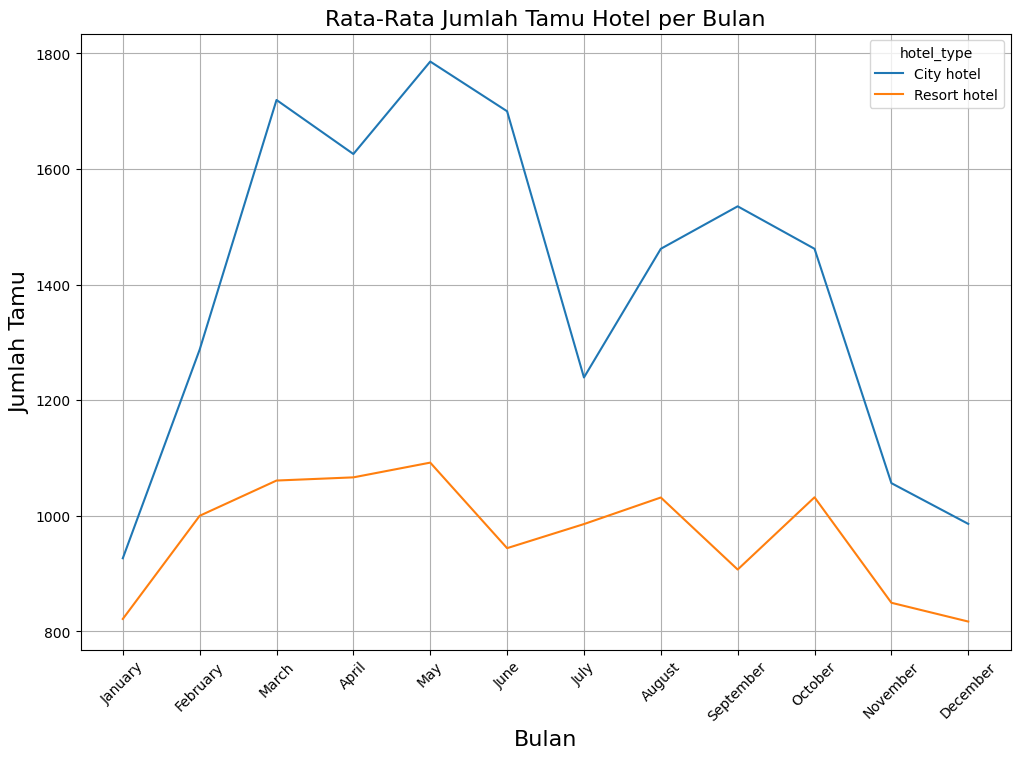

In [67]:
# Membuat DataFrame dengan groupby perbulannya
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

# Ubah ke DataFrame
resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                                  "hotel_type": "Resort hotel",
                                  "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                                "hotel_type": "City hotel",
                                "guests": list(city_guests_monthly.values)})

# Gabungkan kedua Dataframe
full_guest_data = pd.concat([resort_guest_data, city_guest_data], ignore_index=True)

# Urutkan berdasarkan bulan
ordered_months = ["January", "February", "March", "April", "May", "June",
                  "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Normalize data untuk bulan Juli dan Agustus (dibagi dengan 3), dan bulan lainnya (dibagi dengan 2)
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] = full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"), "guests"].astype(float) / 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] = full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")), "guests"].astype(float) / 2

# Pastikan kolom "guests" di-cast ke float setelah pembagian
full_guest_data["guests"] = full_guest_data["guests"].astype(float)

# Show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x="month", y="guests", hue="hotel_type", data=full_guest_data,
             hue_order=["City hotel", "Resort hotel"])
plt.title("Rata-Rata Jumlah Tamu Hotel per Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Jumlah Tamu", fontsize=16)
plt.grid(True)
plt.show()

**Saran untuk menghindari pembatalan:**

1. Meningkatkan okupansi di bulan dengan jumlah tamu Rendah
- Promosi Musim Dingin: Karena musim dingin adalah periode dengan jumlah tamu terendah di kedua hotel, tawarkan paket diskon atau promosi untuk menarik lebih banyak tamu selama periode ini. Promosi seperti "Winter Getaway" dengan diskon kamar, penawaran makan, atau aktivitas gratis bisa membantu menarik tamu.
- Staycation Promos: Menargetkan pasar lokal dengan promosi "staycation" bisa menjadi cara efektif untuk meningkatkan okupansi selama musim dingin. Paket keluarga dengan harga diskon atau program khusus untuk tamu lokal dapat menarik lebih banyak pengunjung selama periode off-peak.

2. Menyesuaikan harga berdasarkan musim
- Dynamic Pricing: Pertimbangkan penyesuaian harga berdasarkan permintaan musiman, terutama di bulan Juli dan Agustus ketika harga di City Hotel rendah, tetapi jumlah tamu juga sedikit. Harga yang lebih kompetitif di musim semi dan gugur (ketika permintaan tinggi) dapat meningkatkan pendapatan, sementara promosi di bulan-bulan sepi (Juli-Agustus) bisa membantu mendongkrak jumlah tamu.
- Penawaran Paket Musim Panas untuk Resort Hotel: Karena jumlah tamu di Resort Hotel sedikit menurun dari Juni hingga September saat harga paling tinggi, berikan paket musim panas dengan fasilitas tambahan atau aktivitas di dalam hotel untuk menarik lebih banyak pengunjung.

### Pemesanan berdasarkan segmen pasar

In [68]:
# Menghitung total pemesanan per market segment (termasuk yang dibatalkan)
segments = data["market_segment"].value_counts().reset_index()
segments.columns = ['market_segment', 'count']  # Ganti nama kolom agar lebih jelas

# Pie plot menggunakan Plotly
fig = px.pie(segments,
             values='count',
             names='market_segment',
             title="Pemesanan per Market Segment",
             template="seaborn")

fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

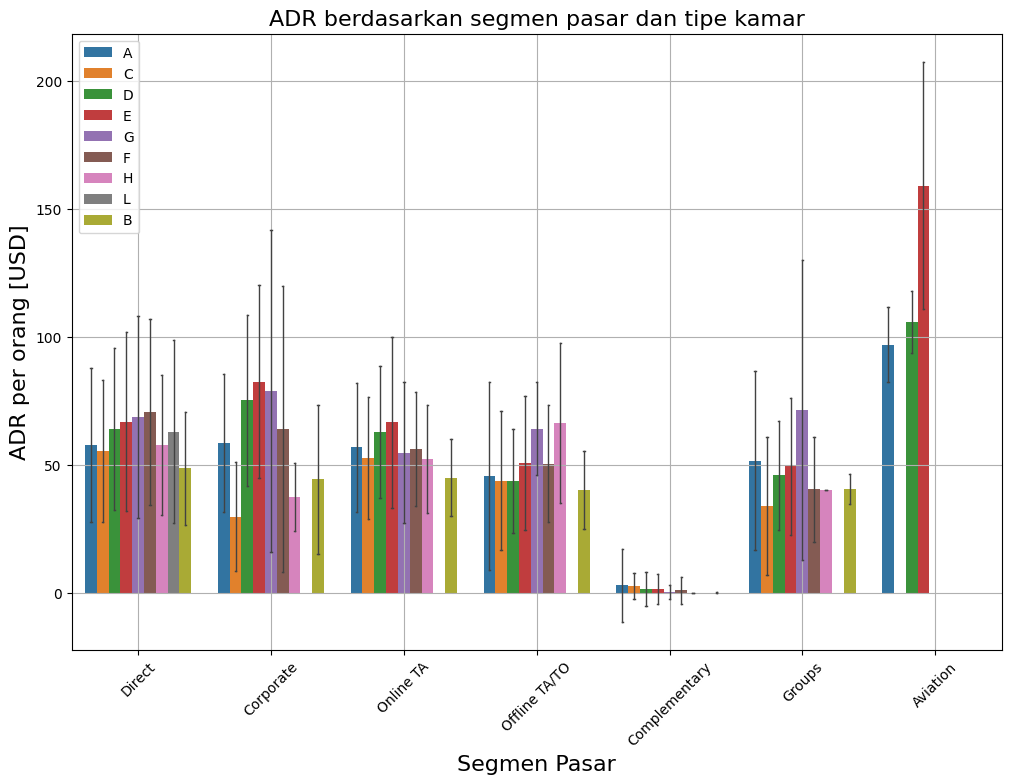

In [69]:
# harga per malam (ADR) dan per orang berdasarkan pemesanan dan kamar.
# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x="market_segment",
            y="adr_pp",
            hue="reserved_room_type",
            data=data,
            errorbar='sd',
            err_kws={'linewidth': 1},
            capsize=0.1)
plt.title("ADR berdasarkan segmen pasar dan tipe kamar", fontsize=16)
plt.xlabel("Segmen Pasar", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per orang [USD]", fontsize=16)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

Rata-rata, 'groups' mendapatkan harga terbaik dan 'aviation' membayar sekitar dua kali lipat lebih banyak.

Apa alasan untuk harga tinggi yang dibayar oleh 'airline'?

In [70]:
# Ringkasan data yang relevan.:
airline_data = data.loc[data["market_segment"]== "Aviation"][["is_canceled", "adults", "lead_time", "adr_pp",]].describe()

non_airline_data = data.loc[data["market_segment"]!= "Aviation"][["is_canceled", "adults", "lead_time", "adr_pp",]].describe()

display(airline_data, non_airline_data)

,is_canceled,adults,lead_time,adr_pp
count,221.000000,221.000000,221.000000,221.000000
mean,0.199095,1.013575,4.361991,101.690860
std,0.400226,0.115980,4.521183,15.584437
min,0.000000,1.000000,0.000000,55.000000
25%,0.000000,1.000000,1.000000,95.000000
50%,0.000000,1.000000,3.000000,95.000000
75%,0.000000,1.000000,6.000000,110.000000
max,1.000000,2.000000,23.000000,193.500000


,is_canceled,adults,lead_time,adr_pp
count,84531.000000,84531.000000,84531.000000,84531.000000
mean,0.274456,1.890383,77.060345,56.195137
std,0.446242,0.616949,80.592569,29.525292
min,0.000000,1.000000,0.000000,-3.190000
25%,0.000000,2.000000,11.000000,38.333333
50%,0.000000,2.000000,48.000000,50.250000
75%,1.000000,2.000000,122.000000,67.500000
max,1.000000,55.000000,365.000000,2700.000000


- Waktu lead-time untuk pemesanan dari aviation sangat singkat: Rata-rata 76 hari dibandingkan dengan 4 hari untuk pemesanan lainnya.
- Airlines memerlukan tempat bagi kru mereka untuk tinggal.
- Personel airlines/maskapai biasanya mendapatkan satu kamar per orang yang berarti lebih banyak kamar total yang dibutuhkan dibandingkan dengan keluarga.
- Berdasarkan analisis yang sudah dilakukan diatas, maskapai memiliki cancellation rate yang rendah dibandingkan dengan jumlah tamu dari market segment airlines.

**Saran untuk mengurangi harga dari airline**
- Untuk mengatasi harga yang sangat jauh dari market segment yang lain, bisa menggabungkan crew di satu kamar yang sama. Misal, 2 pilot dengan 1 kamar.
- Lakukan kerjasama antara maskapai dengan hotel. Misal: promosi hotel di dalam unit pesawat dengan timbal balik pemotongan harga untuk staff maskapai.

## Machine Learning

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84752 entries, 2 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           84752 non-null  object        
 1   is_canceled                     84752 non-null  int64         
 2   lead_time                       84752 non-null  int64         
 3   arrival_date_year               84752 non-null  int64         
 4   arrival_date_month              84752 non-null  object        
 5   arrival_date_week_number        84752 non-null  int64         
 6   arrival_date_day_of_month       84752 non-null  int64         
 7   stays_in_weekend_nights         84752 non-null  int64         
 8   stays_in_week_nights            84752 non-null  int64         
 9   adults                          84752 non-null  int64         
 10  children                        84752 non-null  int64         
 11  babies

Setelah melakukan analisis, kita bisa menghapus kolom yang hanya digunakan pada analisis data.

In [72]:
# Hapus kolom yang tidak dibutuhkan
data = data.drop(['adr_pp', 'days_before_checkin', 'days_canceled_before_checkin'], axis=1)

Setelah shape data seperti bentuk awalnya, kita akan memulai

In [73]:
# Ekstraksi fitur
data['tahun'] = pd.to_datetime(data['reservation_status_date']).dt.year
data['bulan'] = pd.to_datetime(data['reservation_status_date']).dt.month
data['hari'] = pd.to_datetime(data['reservation_status_date']).dt.day

# Hapus kolom tanggal asli
data.drop('reservation_status_date', axis=1, inplace=True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84752 entries, 2 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           84752 non-null  object 
 1   is_canceled                     84752 non-null  int64  
 2   lead_time                       84752 non-null  int64  
 3   arrival_date_year               84752 non-null  int64  
 4   arrival_date_month              84752 non-null  object 
 5   arrival_date_week_number        84752 non-null  int64  
 6   arrival_date_day_of_month       84752 non-null  int64  
 7   stays_in_weekend_nights         84752 non-null  int64  
 8   stays_in_week_nights            84752 non-null  int64  
 9   adults                          84752 non-null  int64  
 10  children                        84752 non-null  int64  
 11  babies                          84752 non-null  int64  
 12  meal                            8475

In [75]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
Numerical columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'tahun', 'bulan', 'hari']


Selanjutnya kita akan mengubah kolom kategorikal menjadi angka dengan one-hot encoding untuk memudahkan model menganalisa datanya.

In [76]:
# Tentukan kolom yang akan di-encode
# Hapus kolom 'country' dari data karena memiliki terlalu banyak kolom unik
data = data.drop('country', axis=1)

cols_to_encode = ['hotel', 'arrival_date_month', 'meal',
                  'market_segment', 'distribution_channel', 'reserved_room_type',
                  'assigned_room_type', 'deposit_type', 'customer_type',
                  'reservation_status', 'arrival_date_month', 'reserved_room_type', 'assigned_room_type']

# Buat OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit dan transform data
encoded_data = encoder.fit_transform(data[cols_to_encode])

# Buat DataFrame baru dari data yang sudah di-encode dengan nama kolom yang tepat
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols_to_encode))

# Reset indeks jika diperlukan untuk menyamakan dengan data asli
encoded_df.index = data.index

# Gabungkan DataFrame yang sudah di-encode dengan DataFrame asli
data = data.drop(cols_to_encode, axis=1)
data = pd.concat([data, encoded_df], axis=1)


Setelah mengubah data menjadi berbentuk numerik, kita akan melakukan feature selection dengan menggunakan chi-square untuk fitur kategorikal dan mutual info classifier untuk fitur numerikal.

In [77]:
label_encoder = LabelEncoder()
data['is_canceled'] = label_encoder.fit_transform(data['is_canceled'])

# Chi-Square Test
chi2_scores, p_values = chi2(encoded_df, data['is_canceled'])
chi2_results = pd.DataFrame({
    'feature': encoder.get_feature_names_out(cols_to_encode),
    'chi2_score': chi2_scores,
    'p_value': p_values
}).sort_values(by='chi2_score', ascending=False)

print("Chi-Square Results for Categorical Features:")
print(chi2_results)

# Feature Selection untuk kolom numerikal menggunakan Mutual Information
numerical_cols.remove('is_canceled')  # Hapus target dari kolom numerikal
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(data[numerical_cols])

# Compute mutual information
mutual_info_scores = mutual_info_classif(scaled_numerical_data, data['is_canceled'])
mutual_info_results = pd.DataFrame({
    'feature': numerical_cols,
    'mutual_info_score': mutual_info_scores
}).sort_values(by='mutual_info_score', ascending=False)

print("\nMutual Information Results for Numerical Features:")
print(mutual_info_results)

Chi-Square Results for Categorical Features:
                         feature    chi2_score   p_value
57   reservation_status_Canceled  58938.551196  0.000000
58  reservation_status_Check-Out  23244.000000  0.000000
59    reservation_status_No-Show   2569.448804  0.000000
24      market_segment_Online TA   1624.282061  0.000000
51       deposit_type_Non Refund   1486.039284  0.000000
..                           ...           ...       ...
52       deposit_type_Refundable      0.092416  0.761128
76          reserved_room_type_E      0.081739  0.774954
34          reserved_room_type_E      0.081739  0.774954
15                       meal_FB      0.009328  0.923059
16                       meal_HB      0.000018  0.996651

[92 rows x 3 columns]

Mutual Information Results for Numerical Features:
                           feature  mutual_info_score
13                           agent           0.046063
16                             adr           0.038875
0                        lead_time

Menghapus kolom kategorikal dengan p-value > 0.05 (tidak signifikan) dan kolom-kolom numerikal dengan mutual information score rendah (misalnya, < 0.01).

In [78]:
# Hapus kolom-kolom kategorikal dengan p-value > 0.05 (tidak signifikan)
cols_to_drop_chi2 = chi2_results[chi2_results['p_value'] > 0.05]['feature'].tolist()

# Hapus kolom-kolom numerikal dengan mutual information score rendah (misalnya, < 0.01)
cols_to_drop_mi = mutual_info_results[mutual_info_results['mutual_info_score'] < 0.01]['feature'].tolist()

# Gabungkan semua kolom yang akan dihapus
cols_to_drop = cols_to_drop_chi2 + cols_to_drop_mi

# Hapus kolom dari dataset
data = data.drop(cols_to_drop, axis=1)

print(f"Kolom yang dihapus: {cols_to_drop}")
print(f"Dataframe setelah penghapusan: {data.shape}")


Kolom yang dihapus: ['assigned_room_type_L', 'assigned_room_type_L', 'reserved_room_type_B', 'reserved_room_type_B', 'distribution_channel_Undefined', 'arrival_date_month_December', 'arrival_date_month_December', 'reserved_room_type_L', 'reserved_room_type_L', 'deposit_type_Refundable', 'reserved_room_type_E', 'reserved_room_type_E', 'meal_FB', 'meal_HB', 'arrival_date_year', 'previous_cancellations', 'previous_bookings_not_canceled', 'company', 'children', 'is_repeated_guest', 'bulan', 'adults', 'stays_in_week_nights', 'stays_in_weekend_nights', 'tahun', 'arrival_date_week_number', 'babies', 'arrival_date_day_of_month', 'days_in_waiting_list', 'hari']
Dataframe setelah penghapusan: (84752, 85)


Memulai operasi untuk model machine learningnya

In [83]:
# Pisahkan features dan target
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# Bagi data menjadi training dan testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# List model
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(), use_label_encoder=False, eval_metric='logloss')
}

# Dictionary untuk menyimpan hasil evaluasi
results = defaultdict(list)

# Loop over setiap model
for name, model in models.items():
    # Buat pipeline dengan SMOTE dan model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normalisasi fitur numerikal
        ('smote', SMOTE(random_state=42)),  # Oversampling dengan SMOTE
        ('model', model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Prediksi pada testing set
    y_pred = pipeline.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Simpan hasil evaluasi
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)

# Convert results menjadi DataFrame untuk visualisasi
results_df = pd.DataFrame(results)

# Print hasil evaluasi
print(results_df)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[14:40:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  1.000000   1.000000  1.000000   1.00000
1                  KNN  0.988437   0.986242  0.971392   0.97876
2        Decision Tree  1.000000   1.000000  1.000000   1.00000
3        Random Forest  1.000000   1.000000  1.000000   1.00000
4              XGBoost  1.000000   1.000000  1.000000   1.00000


**Cross validation**

In [85]:
# Pisahkan features dan target
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# Pastikan semua kolom numerik
X = X.select_dtypes(include=[np.number])

# StandardScaler untuk memastikan data telah diskalakan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List model
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=(y == 0).sum() / (y == 1).sum(), use_label_encoder=False, eval_metric='logloss')
}

# Mendefinisikan fungsi untuk melakukan cross-validation
def evaluate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    return scores

# List untuk menyimpan hasil cross-validation
cv_results = defaultdict(list)

# Loop over setiap model
for name, model in models.items():
    try:
        # Lakukan cross-validation
        f1_scores = evaluate_model(model, X_scaled, y, cv=5)

        # Simpan hasil evaluasi
        cv_results["Model"].append(name)
        cv_results["F1-Score Mean"].append(np.mean(f1_scores))
        cv_results["F1-Score Std"].append(np.std(f1_scores))
    except Exception as e:
        print(f"Model {name} failed with error: {e}")

# Convert results menjadi DataFrame untuk visualisasi
cv_results_df = pd.DataFrame(cv_results)

# Print hasil cross-validation
print(cv_results_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[14:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[14:45:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[14:45:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[14:45:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[14:45:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




                 Model  F1-Score Mean  F1-Score Std
0  Logistic Regression       1.000000      0.000000
1                  KNN       0.905735      0.048711
2        Decision Tree       1.000000      0.000000
3        Random Forest       1.000000      0.000000
4              XGBoost       1.000000      0.000000


**Hyperparameter Tuning untuk KNN**

In [87]:
# Parameter yang ingin dicari
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

# Membuat model KNN
knn = KNeighborsClassifier()

# Menerapkan GridSearchCV
grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=5)
grid_search.fit(X_scaled, y)

# Menampilkan hasil
print("Best parameters for KNN:", grid_search.best_params_)
print("Best F1-Score from GridSearchCV:", grid_search.best_score_)

Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best F1-Score from GridSearchCV: 0.9246360031876293


Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memfilter/menyaring list pemesanan yang dibatalkan, maka model kita dapat mengurangi 100% pemesanan yang akan dibatalkan, dan model kita dapat mendapatkan 100% pemesanan yang tertarik dari seluruh pemesanan yang dibuat. (semua ini berdasarkan recallnya)

Model kita ini memiliki ketepatan prediksi pemesanan yang tidak dicancel sebesar 100% (precisionnya), jadi setiap model kita memprediksi bahwa sebuah pesanan itu tidak dicancel, maka kemungkinan tebakannya benar itu sebesar 100%. Maka tidak akan ada  pemesanan yang sebenarnya dicancel tetapi diprediksi sebagai pesanan yang tidak dicancel dari keseluruhan pemesanan yang dicancel (berdasarkan recall).

**Tanpa model:**

Asumsi Biaya (Perkiraan):

Membuat perkiraan biaya yang sangat spesifik sulit dilakukan tanpa data yang akurat. Namun, sebagai gambaran umum, biaya persiapan kamar tanpa meal bisa berkisar sekitar Rp 200.000 per kamar di Indonesia (acuan data yang ditemukan berasal dari kompas.com). Jika ditambahkan meal Rp 60.000/orang/per satu kali makan x 3. Maka hotel akan mengeluarkan biaya Rp 380.000 -> 25,15 USD untuk 1 kamar dengan 1 orang. Jika rata-rata 2 orang dewasa maka akan Rp 560.000 -> USD 37,06 per hari.

**Dengan model:**

Keuntungan yang didapatkan hotel per malam dan per orang:

Resort hotel: 48.92 USD per malam dan per orang.
City hotel: 60.01 USD per malam dan per orang.

Resort Hotel: 48.92 USD - 25,15 USD = 23,92 USD
City Hotel: 60.01 - 25,15 USD = 34,86 USD

**Implementation Model:**

Pada book ini kami merekomendasikan 2 pilihan yang dapat dipilih oleh stakeholder:
- Model akan dipakai H-2 kedatangan. Kelebihan: Bisa mempersempit kemungkinan pembatalan.
Kekurangan: Kurangnya waktu untuk menjual kamar kembali jika diprediksi cancel.
- H-7 kedatangan. Kelebihannya: mempunyai cukup waktu untuk menjual kembali kamar jika cancel. Kekurangannya: memungkinkan terjadinya double book jika false positive akibat customer checkin.

**Rekomendasi**
Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Mencoba model dengan testing data atau dataset lainnya yang lebih besar.
- Parameter tuning untuk KNN yang lebih baik.
- Meskipun model dengan akurasi 100% sangat baik, ini dapat menunjukkan bahwa model mungkin overfit pada data pelatihan. Pertimbangkan untuk menyederhanakan model dengan mengurangi kompleksitas (misalnya, mengurangi kedalaman pohon di Random Forest atau Decision Tree).
- Lakukan analisis terhadap feature importance dari model yang Anda gunakan (terutama XGBoost dan Random Forest) untuk memahami fitur mana yang paling berpengaruh terhadap prediksi.